# Предсказание цены на подержанный автомобиль

   Вопрос назначения цены становится актуальным, когда человек хочет продать свой автомобиль. Какую цену ставить в объявлении? Для этого нужно потратить существенное время, чтобы изучить похожие объявления на разных интернет-площадках.
Объявлений огромное количество, можно легко упустить что-то из виду, продешевить или наоборот, поставить завышенную цену 
и тем самым не привлечь потенциальных покупателей.
Мы исследуем рынок подержанных авто на примере автомобиля Kia Rio (я являюсь владельцем такого авто, и мне интересно предсказать его цену) и построим предиктивную модель.

Осуществим парсинг сайта auto.ru с объявлениями о продаже подержанных автомобилей Kia Rio

[Код парсера](https://github.com/FelixMusic/myprojects/blob/master/AutoRU_parser.py)

In [1]:
# Импортируем необходимые для работы библиотеки и модули

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

Сначала мы будем работать с данными с сайта auto.ru, отберем необходимые признаки для предиктивной модели, затем осуществим парсинг еще двух сайтов с объявлениями, но будем забирать уже только необходимые данные. Далее мы объединим вместе все полученные данные из трех источников, удалим дубликаты и построим предиктивную модель.

### Обработаем данные с сайта auto.ru

In [2]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [4]:
# Назначим имена колонок в фрейме

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head(3)

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [6]:
# Посмотрим размер нашего дата-сета

auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [11]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 14
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio  III 4-speed
Kia Rio IV X-Line
Kia Rio  III 5-speed
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio  III 6-speed
Kia Rio II
Kia Rio  I Рестайлинг
Kia Rio I
Kia Rio  IV
Kia Rio  III Рестайлинг

   body_type: 3
седан
хэтчбек 5 дв.
универсал 5 дв.

   color: 14
белый
чёрный
серый
зелёный
бежевый
коричневый
серебристый
красный
оранжевый
голубой
синий
золотистый
жёлтый
фиолетовый

   engine_volume: 4
1.6 
1.4 
1.5 
1.3 

   engine_power: 11
123
107
100
97
98
95
112
75
105
84
108

   fuel_type: 2
 Бензин
 Бензин, газобаллонное оборудование

   transmission: 2
автоматическая
механическая

   drive: 1
передний

   wheel: 1
Левый

   condition: 1
Не требует ремонта

   owners_count: 3
1 владелец
3 или более
2 владельца

   passport: 2
Оригинал
Дубликат

   customs: 1
Растаможен

   complectation_type: 20
Комплектация
None
Комплектация Prestige AV
Комплектация Comfort Аудио
Комплектация Prestige
Комплектация Luxe
Комплектация 

In [12]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [13]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [14]:
# Все автомобили растаможены, так что столбец 'customs' можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [15]:
# Все автомобили не требуют ремонта, удаляем столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [16]:
# Количество различных моделей

len(auto_data['model'].unique())

14

Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов: где-то один пробел, а где-то два. Заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III', чтобы уменьшить число категорий признака 'model'

In [17]:
auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [18]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III', т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [19]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [20]:
# В итоге у нас получилось 8 моделей

for i in auto_data['model'].unique():
    print(i)

Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio IV X-Line
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio II
Kia Rio I


In [21]:
# Посмотрим количество строк, где тип комплектации отсутствует(None) либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 14)

In [22]:
auto_data.shape

(1064, 14)

In [23]:
# Процент пропущенных данных

print((802 / 1064) * 100)

75.37593984962406


В столбце 'complectation_type' отсутствует более 75% данных. Его тоже удаляем

In [24]:
auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [25]:
auto_data.head(3)

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Москва,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Тула,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,Калуга,695000


In [26]:
# Посмотрим количество ПТС оригиналов и дубликатов

auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

Влияное признака 'passport' будет рассмотрено ниже.
В данных представлены **три** различных типа кузовов, их влияние на цену также рассмотри ниже.

In [27]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None,None


Оставим только те данные, где указана цена, т.к. цена является целевым признаком. Если цена отсутствует - автомобиль уже продан.

In [28]:
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [29]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [30]:
# Удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [31]:
auto_data.shape

(994, 13)

In [32]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [33]:
# Количество различных городов/населенных пунктов

len(auto_data['region'].unique())

109

В столбце 'region' много городов Московской области. Заменим их значения на 'МО', чтобы сократить список.

In [34]:
# Создадим список всех городов Московской области:

mo_cityes = ['Апрелевка','Балашиха', 'Бронницы','Верея','Видное','Волоколамск','Воскресенск','Голицыно','Дзержинский',
      'Дмитров','Долгопрудный','Домодедово','Дрезна','Дубна','Егорьевск','Жуковский','Зарайск','Звенигород',
      'Ивантеевка','Истра','Кашира','Климовск','Клин','Коломна','Королёв','Котельники','Красмоармейск','Красногорск',
      'Краснозаводск','Краснознаменск','Кубинка','Куровское','Ликино-Дулево','Лобня','Лосино-Петровский','Луховицы',
      'Лыткарино','Люберцы','Можайск','Мытищи','Наро-Фоминск','Ногинск','Одинцово','Озеры','Орехово-Зуево',
      'Павловский Посад','Пересвет','Подольск','Протвино','Пушкино','Пущино','Раменское','Реутов','Рошаль','Руза',
      'Сергиев Посад','Серпухов','Солнечногорск','Старая Купавна','Ступино','Талдом','Фрязино','Химки',
      'Хотьково','Черноголовка','Чехов','Шатура','Щелково','Электрогорск','Электросталь','Электроугли',
      'Юбилейный','Яхрома']

In [35]:
# заменим требуемые значения

for i in auto_data['region'].unique():
    if i in mo_cityes:
        auto_data['region'] = auto_data['region'].str.replace(i,'МО')

In [36]:
len(auto_data['region'].unique())

60

Список сократился на 49 значений.

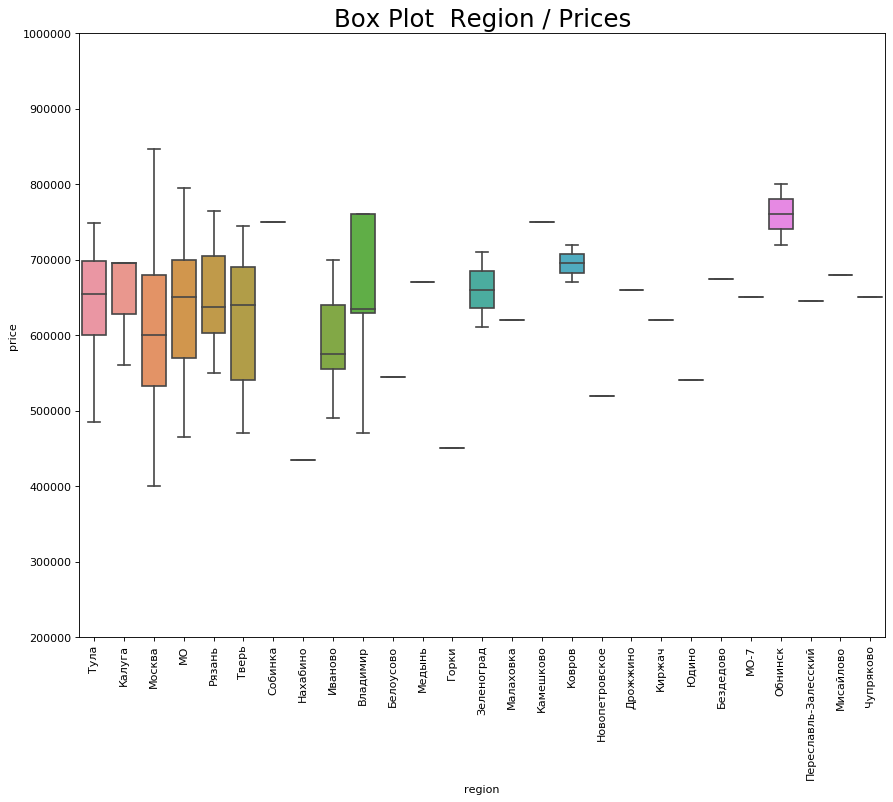

In [37]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III Рестайлинг'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Region / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

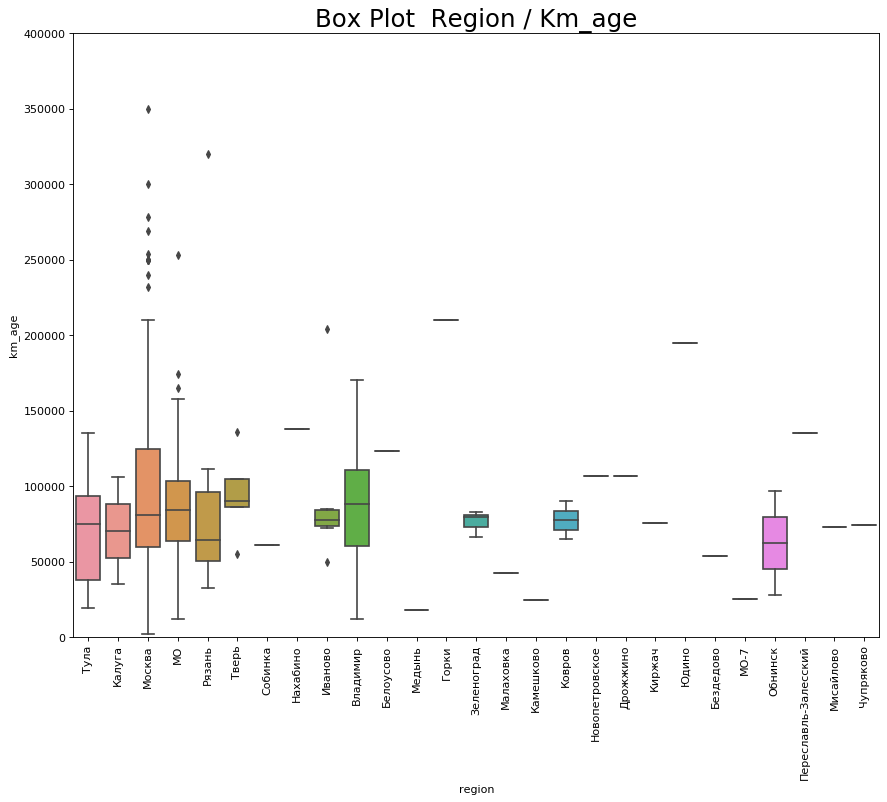

In [38]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio III Рестайлинг'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Region / Km_age', fontsize=22)
plt.ylim(0, 400000)
plt.show()

**Цены на Kia Rio III Рестайлинг входят в межквартильный размах цен Москвы (Box Plot с самым большим размахом).
Медианные значения цен по регионам выше там, где меньше медианное значение пробега.
Можно сделать вывод, что цены по стране примерно одинаковые.**

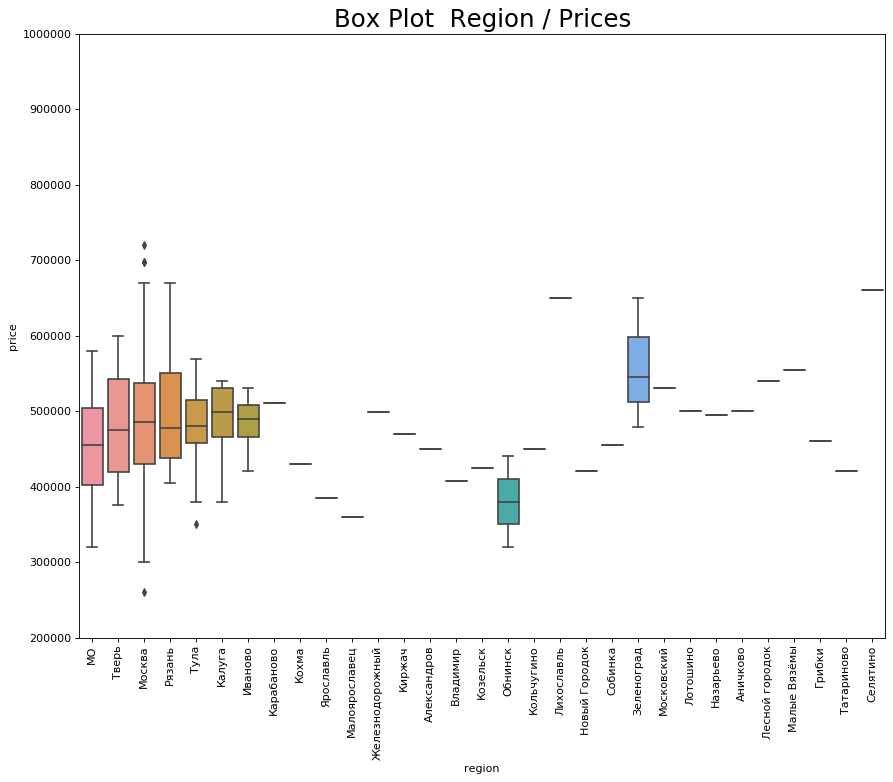

In [39]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Region / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

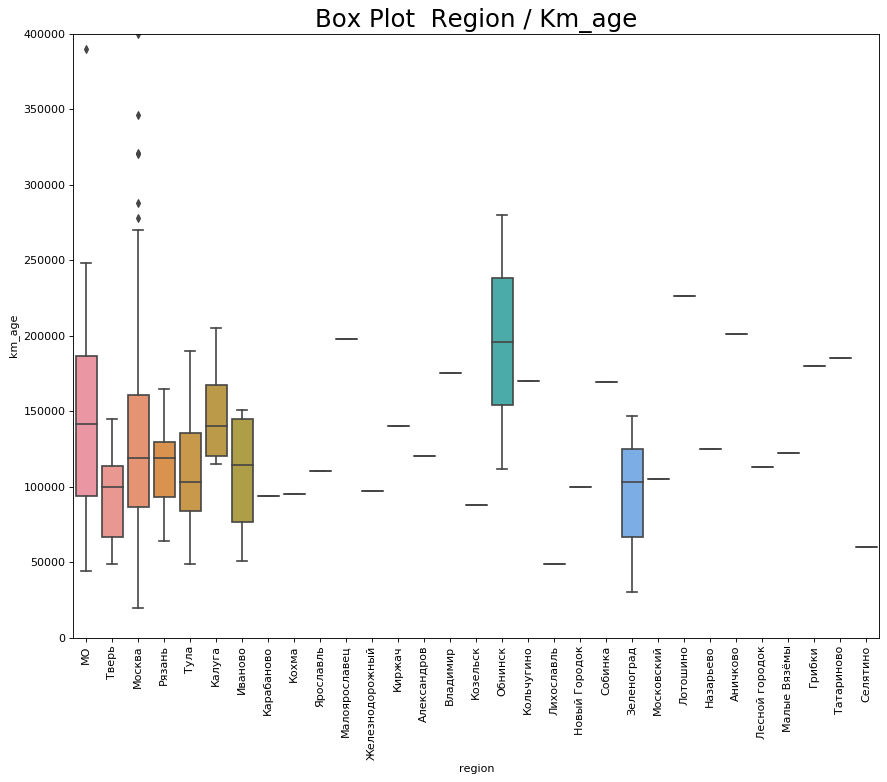

In [40]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio III'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio III'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Region / Km_age', fontsize=22)
plt.ylim(0, 400000)
plt.show()

**Для Kia Rio III картина похожая. Медианные значения цен по регионам выше там, где меньше медианное значение пробега.**

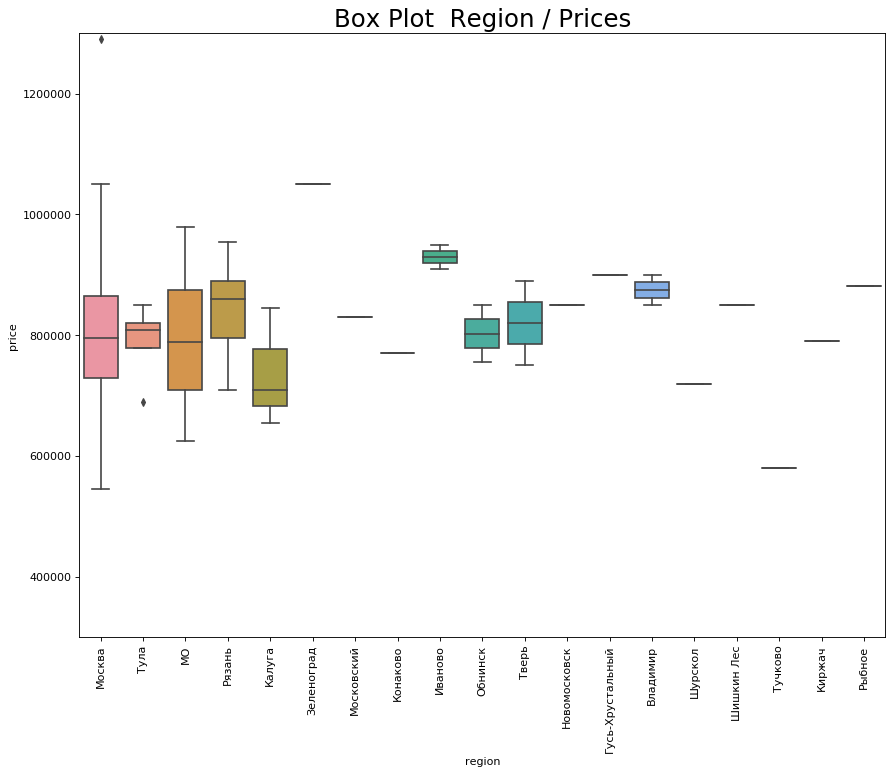

In [41]:
# Построим Box Plot цены по регионам для модели 'Kia Rio IV'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio IV'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio IV'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Region / Prices', fontsize=22)
plt.ylim(300000, 1300000)
plt.show()

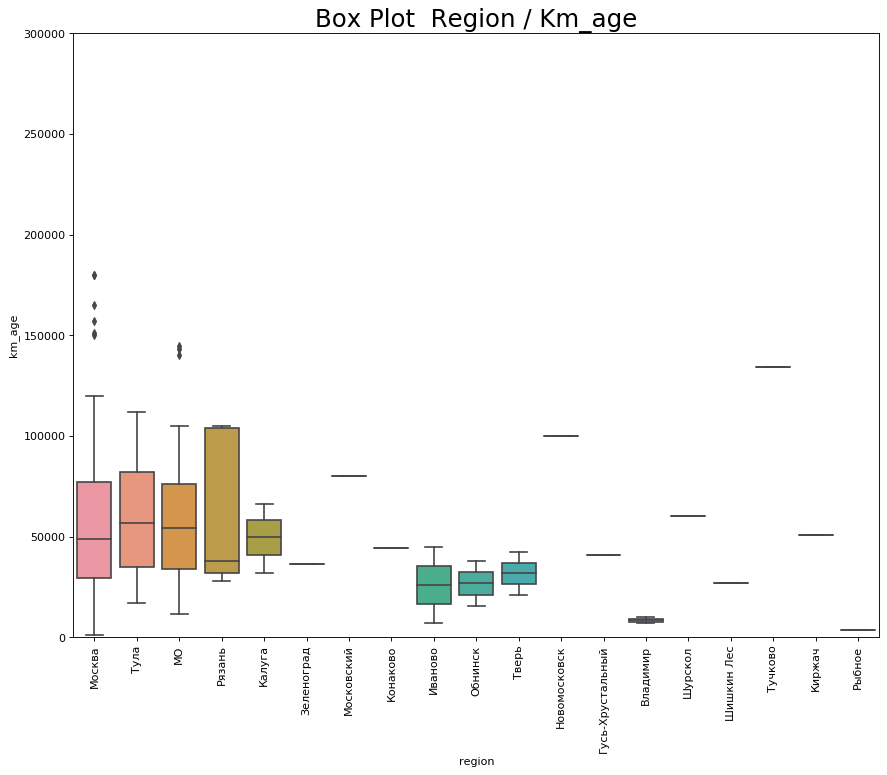

In [42]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio IV'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio IV'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio IV'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Region / Km_age', fontsize=22)
plt.ylim(0, 300000)
plt.show()

**Для Kia Rio IV картина похожая**

In [43]:
# Удалим столбец 'region'

auto_data.drop(['region'], axis='columns', inplace=True)

## Распределение целевого признака (цены)


 mu = 578168.89 and sigma = 207001.98



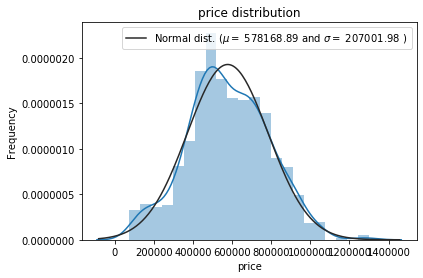

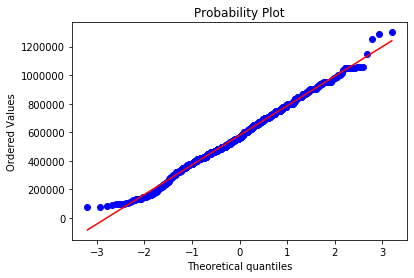

In [44]:
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [45]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.071111
Kurtosis: -0.083184


**Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается.**

In [46]:
# Заменим значение 'газобаллонное оборудование' на 'ГБО'

auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [47]:
for i in auto_data['fuel_type'].unique():
    print(i)

 Бензин
 Бензин, ГБО


In [48]:
# Сгруппируем данные по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      168567.567568
Kia Rio II                278719.192308
Kia Rio II Рестайлинг     355235.135135
Kia Rio III               480540.362007
Kia Rio III Рестайлинг    611198.620130
Kia Rio IV                798281.362745
Kia Rio IV X-Line         924893.153846
Name: price, dtype: float64

In [49]:
# Для удобства создадим фрейм данных с именем df

df = auto_data.copy()

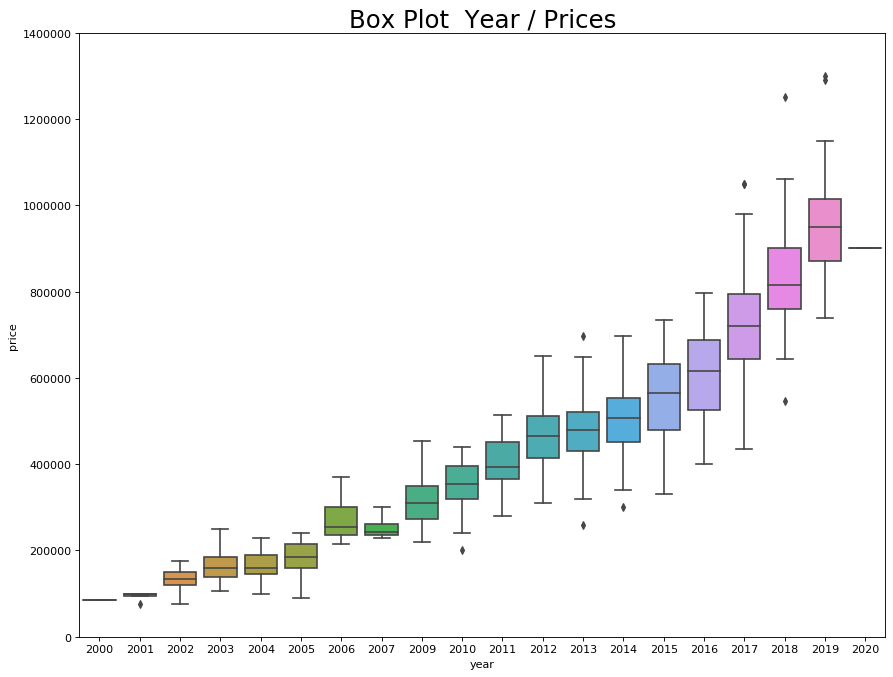

In [50]:
# Построим Box Plot цены по годам выпуска.

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

**На графике присутствуют "выбросы" по цене. У дилера есть определенная линейка комплектаций, она укладывается в статистику. Если цена заметно выше, то велика вероятность, что владелец установил за дополнительную плату какое-нибудь дорогое дополнительное оборудование (диски/мультимедиа/камеры и т.п.). Такие "выбросы" лучше исключить. Если же цена очень низкая - скорее всего авто в не очень хорошем состоянии.
Пока не будем удалять выбросы, построим модель и посмотрим, какие будут результаты сначала с выбросами, а потом без них.**

**Посмотрим на матрицу корреляций**

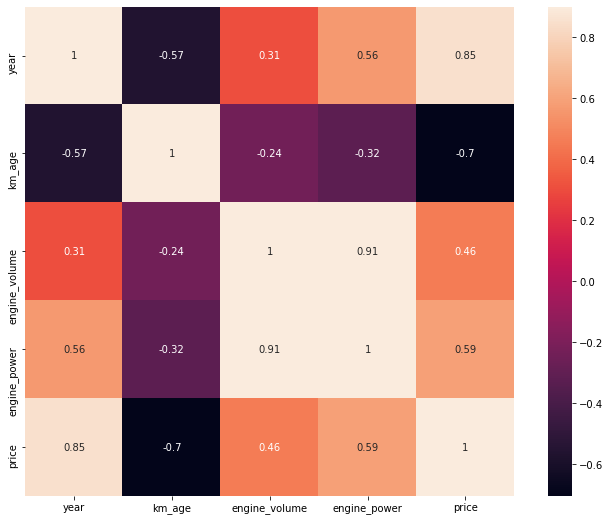

In [51]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

**На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой. Действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
Удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей.**

In [52]:
# Удаляем столбец 'engine_volume'

df.drop(['engine_volume'], axis='columns', inplace=True)

In [53]:
df.head(3)

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000


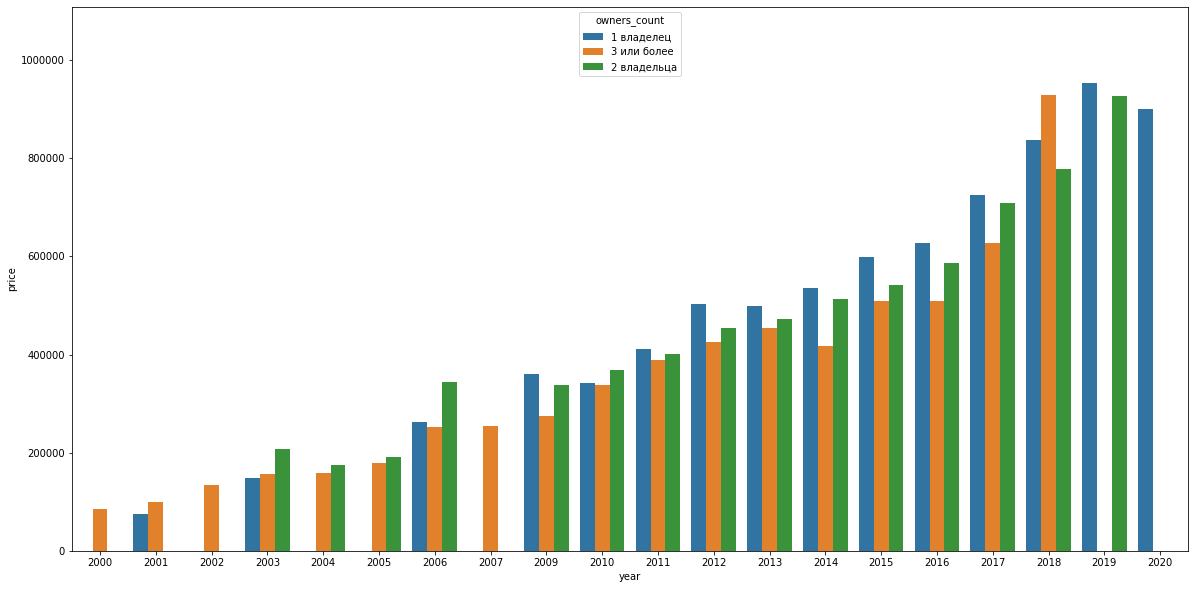

In [54]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

**В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые автомобили, на которые есть хороший спрос.**

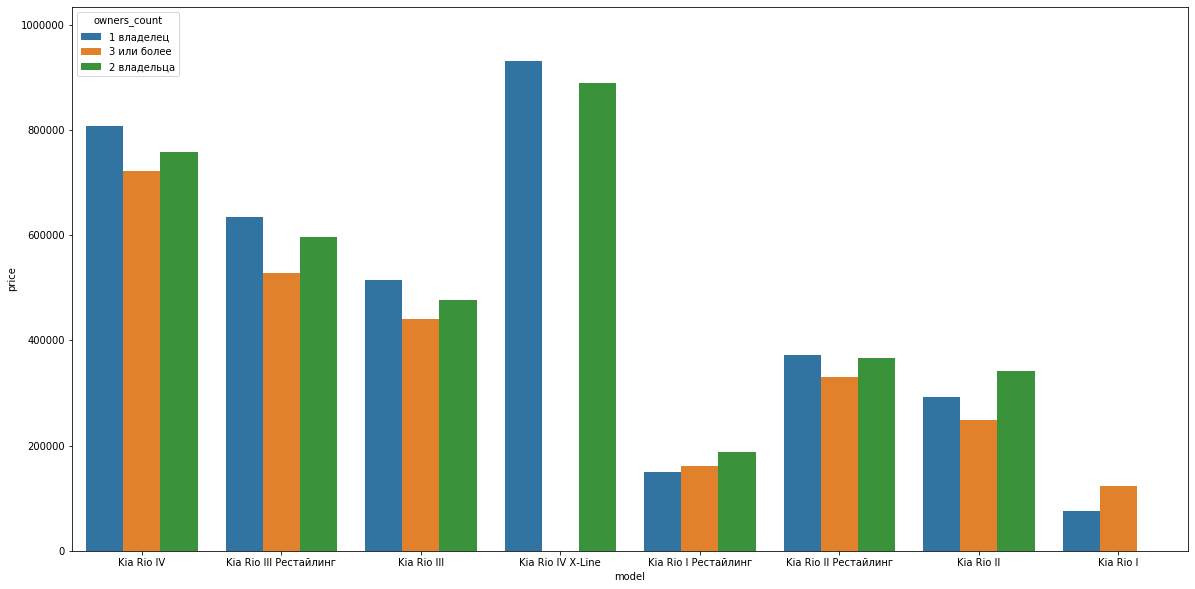

In [55]:
# Построим диаграмму цен в зависимости от количества владельцев по моделям

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

**Такая же картина начиная с "Kia Rio III Рестайлинг"**

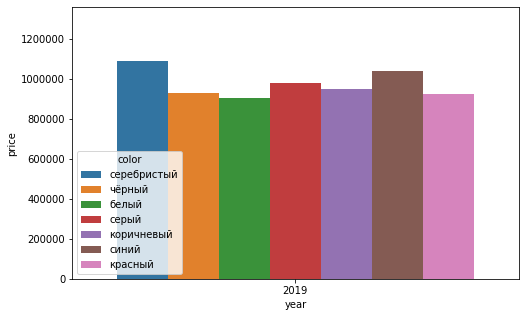

In [56]:
# Цена, в зависимости от цвета для 2019 года

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

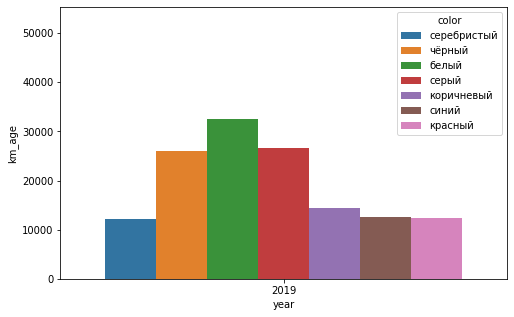

In [57]:
# Пробег овтомобилей различных цветов в 2019 году

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

**На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам. Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях), например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.**

**Проверим картину для 2018 года**

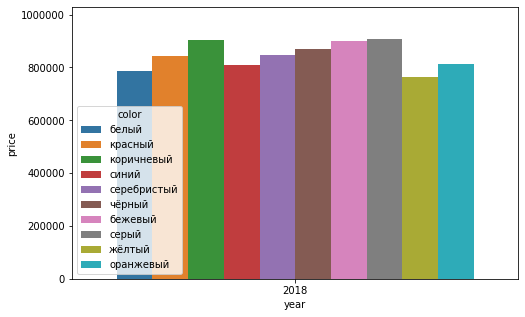

In [58]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

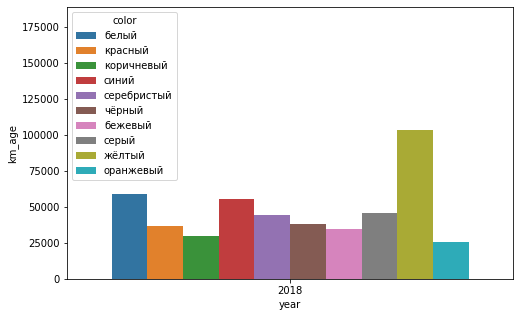

In [59]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

**Картина примерно такая же.**

In [60]:
# Теперь можно удалить столбец 'color'

df.drop(['color'], axis='columns', inplace=True)

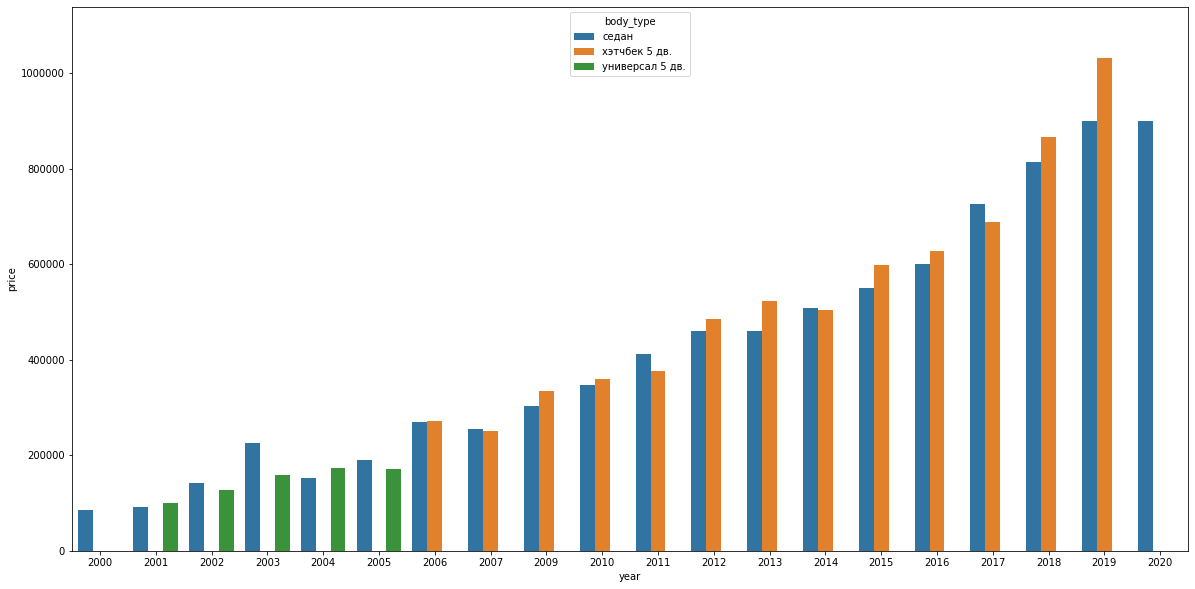

In [61]:
# Посмотрим на диаграммы цен по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

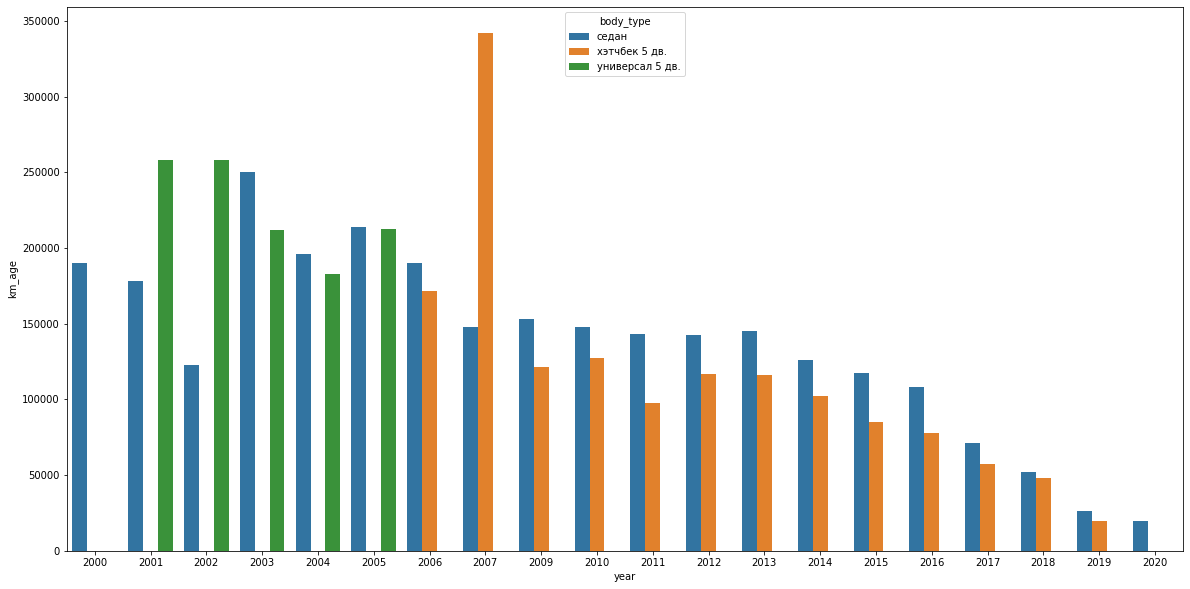

In [62]:
# Посмотрим на диаграммы пробегов по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

**В большинстве годов выпуска хэтчбеки стоили немного дороже седанов. Но у хэтчбеков был ниже пробег по годам.
Новые хэтчбеки в автосалонах стоят немного дороже седанов, поэтому оставим этот признак.**

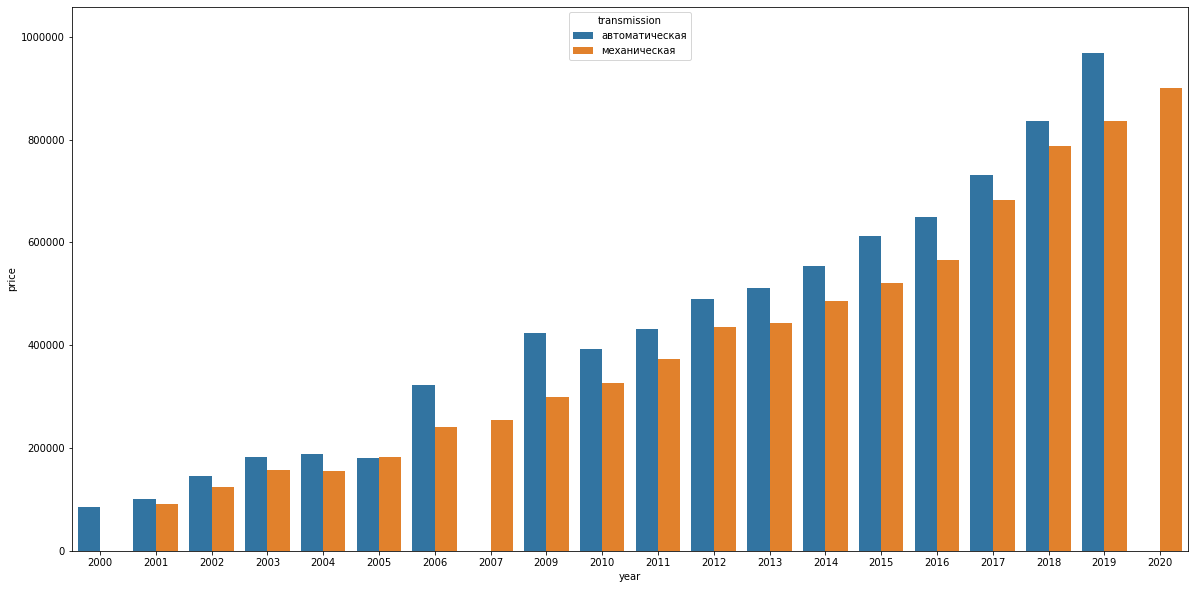

In [63]:
# Диаграмма цен по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

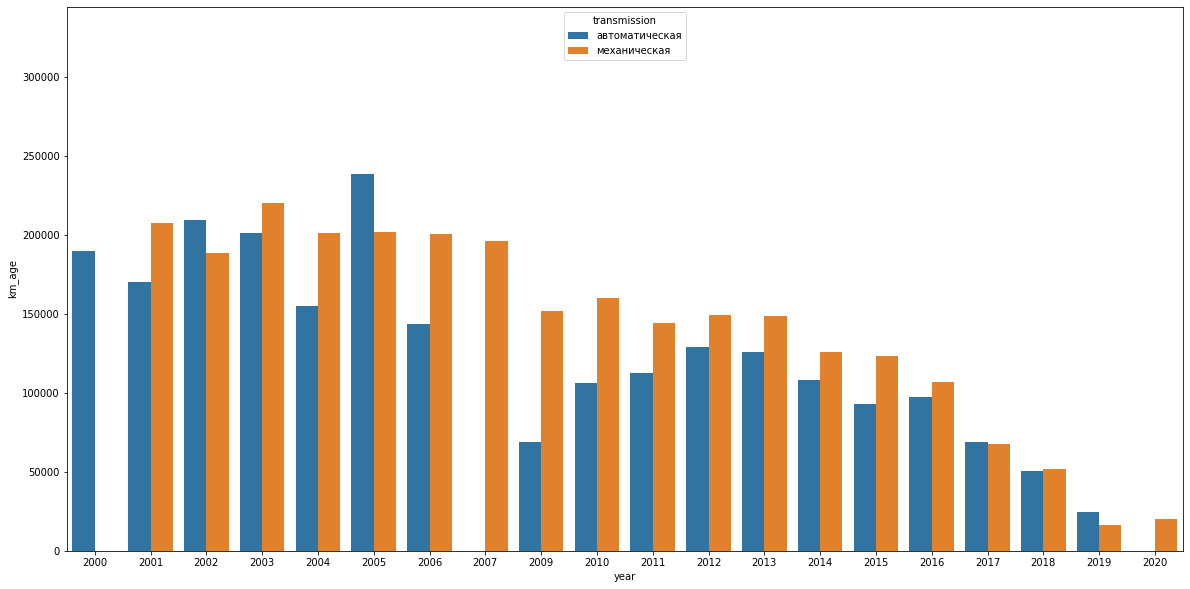

In [64]:
# Диаграмма пробегов по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

**Автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике". Новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление.**

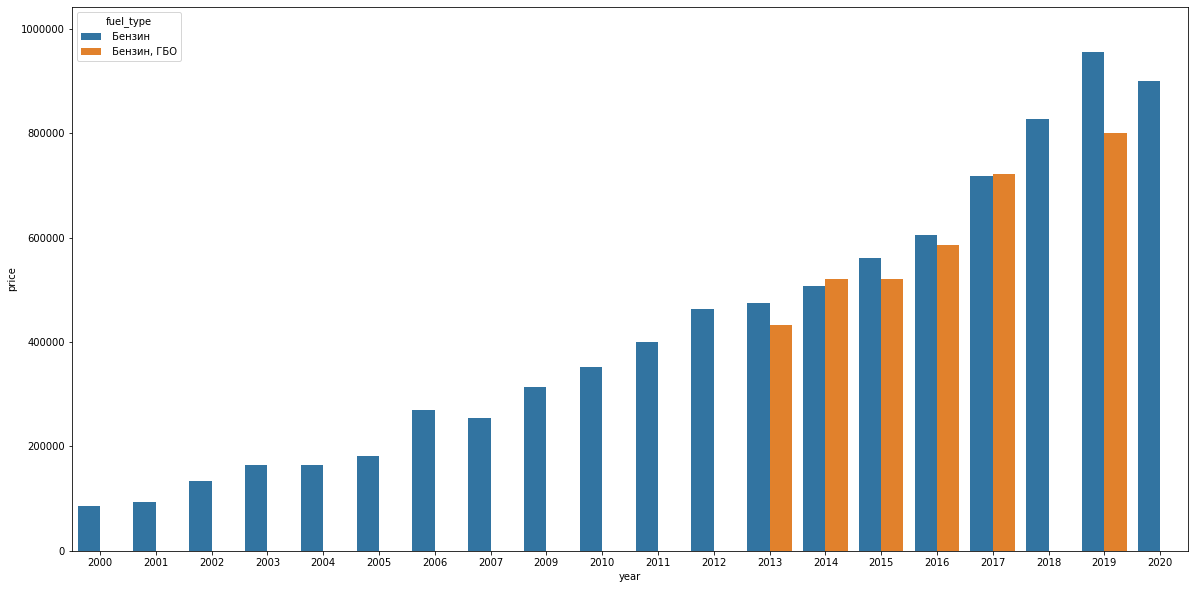

In [65]:
# Диаграмма цен по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

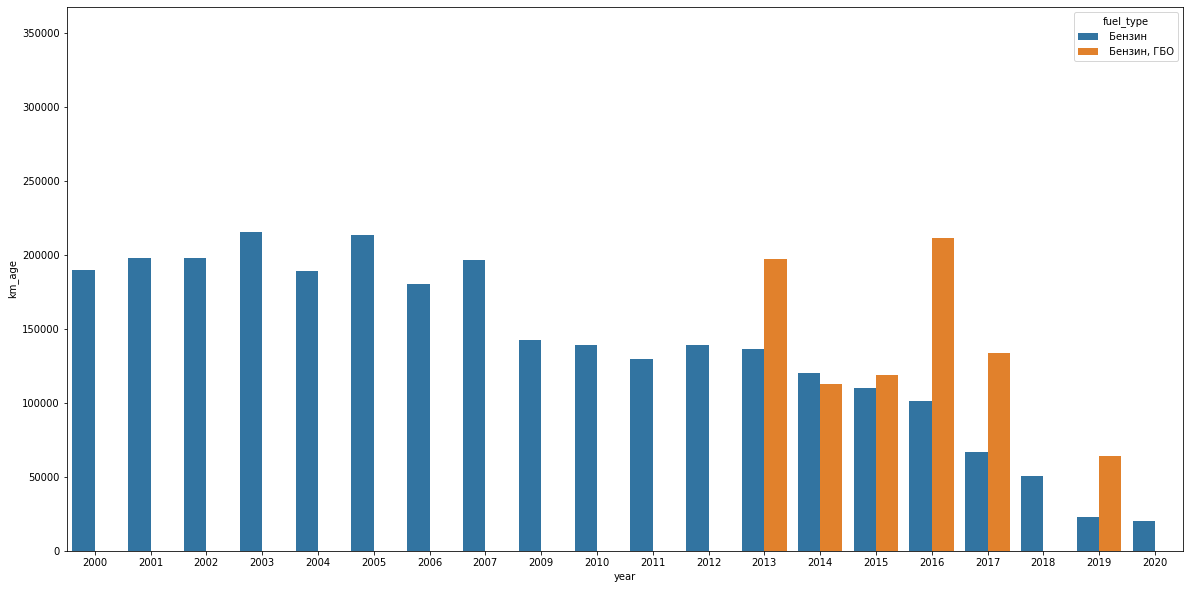

In [66]:
# Диаграмма пробегов по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [67]:
# Посмотрим количество автомобилей в группах с различными типами топлива

df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         980
 Бензин, ГБО     14
Name: model, dtype: int64

**Автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков видно, что цена автомобилей с ГБО зависит от пробега.**

In [68]:
# Удалим столбец 'fuel_type'

df.drop(['fuel_type'], axis='columns', inplace=True)

In [69]:
df.head(3)

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000


In [70]:
# Посмотрим, сколько ПТС оригиналов и дубликатов

df.groupby('passport').count()['model']

passport
Дубликат     66
Оригинал    928
Name: model, dtype: int64

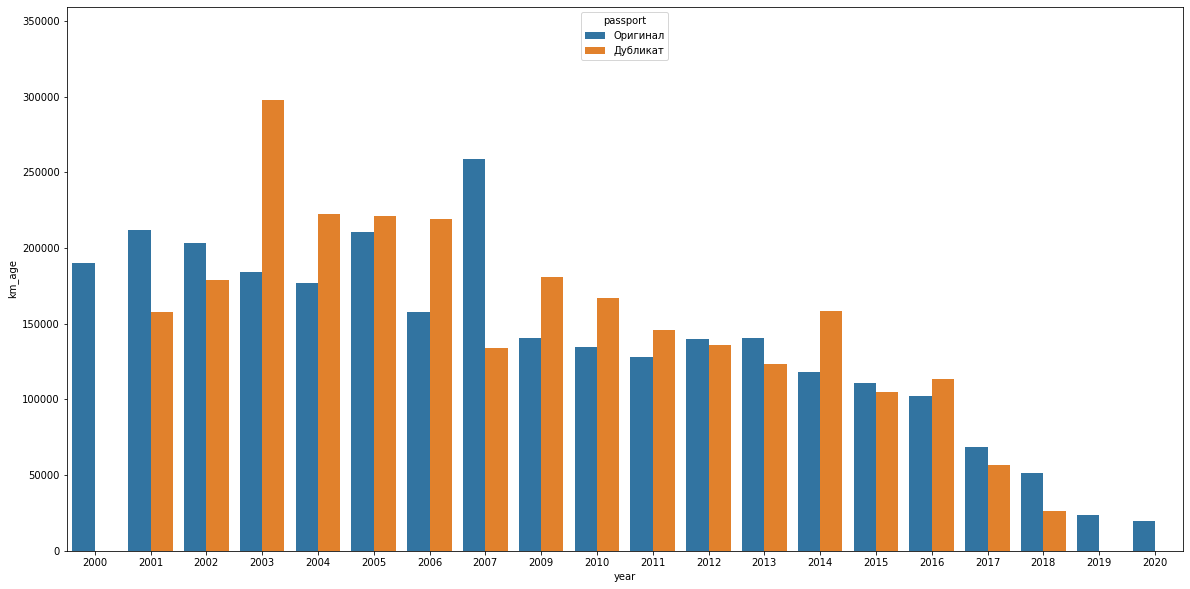

In [71]:
# Диаграмма пробегов с различными видами ПТС по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

**Дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много владельцев. В принципе, ничего криминального в дубликате ПТС нет. Тем более, нами было выяснено, что наличие этого признака ухудшает модель (возрастает RMSE).**

In [72]:
# Удалим колонку 'passport'

df.drop(['passport'], axis='columns', inplace=True)

In [73]:
df.head(3)

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000


In [74]:
# Итоговые признаки для дальнейшей работы

print(df.columns.tolist())

['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission', 'owners_count', 'price']


In [75]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df.copy()

----------------------------------------------------------------------------------------
## Обработаем данные с сайта drom.ru

[Код парсера](https://github.com/FelixMusic/myprojects/blob/master/DromRU_parser.py)

**Как говорилось ранее, будем извлекать только те данные, которые были отобраны выше.**

In [76]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [77]:
# Назначим имена колонок

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [78]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [79]:
auto_data.shape

(2000, 8)

In [80]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [81]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [82]:
# Оставим только те строки, где указан пробег

auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [83]:
auto_data.shape

(1236, 8)

In [84]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'engine_power', 'transmission','owners_count']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 7
2 поколение, рестайлинг
3 поколение
3 поколение, рестайлинг
4 поколение
1 поколение, рестайлинг
2 поколение
1 поколение

   body_type: 3
седан
хэтчбек 5 дв.
универсал

   engine_power: 7
95
107
123
97
100
96
84

   transmission: 2
автомат
механика

   owners_count: 11
1 запись
3 записи
2 записи
5 записей
4 записи
6 записей
8 записей
7 записей
9 записей
11 записей
10 записей



In [85]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [86]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II, рестайлинг
Kia Rio III
Kia Rio III, рестайлинг
Kia Rio IV
Kia Rio I, рестайлинг
Kia Rio II
Kia Rio I


In [87]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее
# Также пропишем слово 'рестайлинг' с заглавной буквы

auto_data['model'] = auto_data['model'].str.replace(",",'')
auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [88]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio III
Kia Rio III Рестайлинг
Kia Rio IV
Kia Rio I Рестайлинг
Kia Rio II
Kia Rio I


In [89]:
# Заменим значения типов трансмиссии, как в данных с auto.ru

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [90]:
# Заменим значения типа кузова, как в данных с auto.ru

auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [91]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [92]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [93]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [94]:
# проверим

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [95]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [96]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

### Распределение целевого признака (цены)


 mu = 579330.09 and sigma = 182006.35



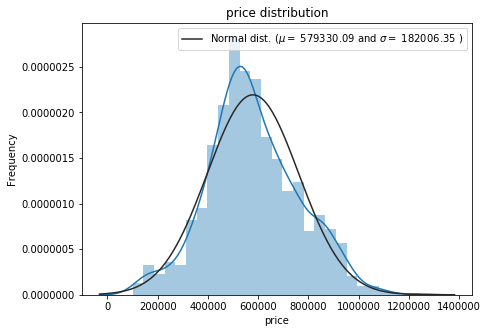

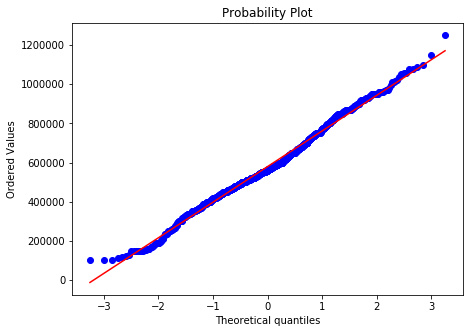

In [97]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [98]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.191390
Kurtosis: 0.096398


**Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается.**

In [99]:
# Для удобства создадим фрейм данных с именем df

df = auto_data.copy()

In [100]:
df.shape

(1233, 8)

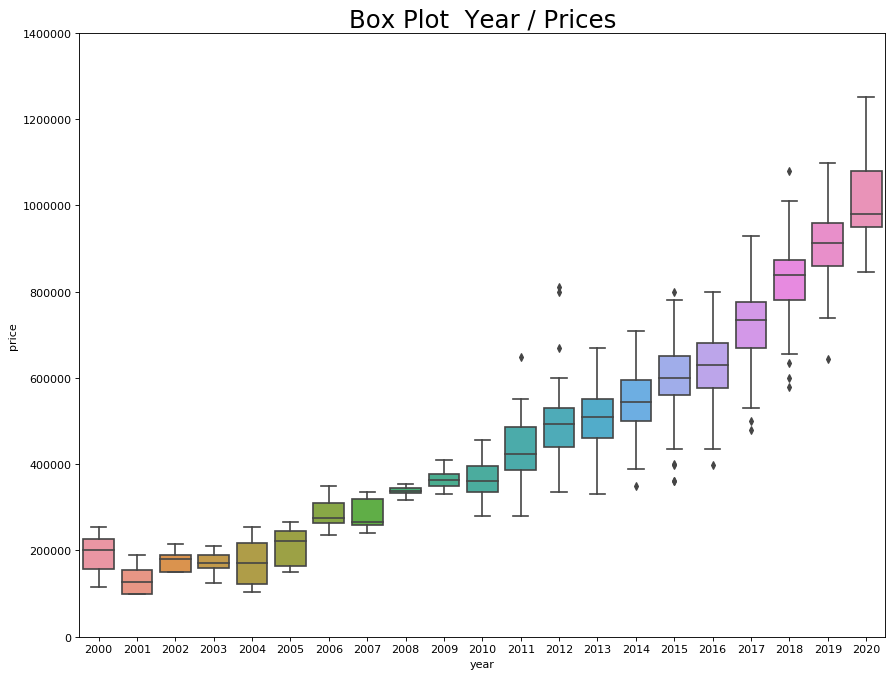

In [101]:
# Построим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

**Как и в первом случае, выбросы пока удалять не будем.**

In [102]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df.copy()

---------------------------------------------------------------------------------------------------
## Обработаем данные с сайта с avito.ru

[Код парсера](https://github.com/FelixMusic/myprojects/blob/master/Avito_AUTO_parser.py)

В объявлениях на сайте присутствует параметр "техническое состояние", мы дополнительно собрали и эти данные, чтобы потом отсеять "битые" автомобили.

In [103]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [104]:
# Назначаем имена колонок

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [105]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [106]:
auto_data.shape

(4707, 9)

In [107]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [108]:
auto_data.shape

(4328, 9)

In [109]:
# Посмотрим уникальные значения некоторых столбцов

for i in [ 'model', 'body_type', 'engine_power', 'transmission','owners_count', 'condition']:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 8
II рестайлинг
II
III
IV
III рестайлинг
I рестайлинг
I
IV рестайлинг

   body_type: 2
седан
хетчбэк

   engine_power: 13
97
123
107
100
95
98
108
75
105
84
109
112
82

   transmission: 2
автомат
механика

   owners_count: 4
3
2
4+
1

   condition: 2
не битый
битый



In [110]:
# Заменим значение типа трансмиссии

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [111]:
# Сгруппируем по состоянию и посмотрим количество битых и не битых

auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [112]:
# итого 108 битых автомобилей. Исключим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [113]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [114]:
# Переименум названия моделей

auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [115]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [116]:
# Посмотрим, что получилось

for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio II
Kia Rio III
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio I Рестайлинг
Kia Rio I
Kia Rio IV Рестайлинг


In [117]:
# Переименуем значения в столбце 'owners_count'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [118]:
# Посмотрим, что получилось

for i in auto_data['owners_count'].unique():
    print(i)

3 или более
2 владельца
3 или более+
1 владелец


In [119]:
# В значении '3 или более+' уберем '+'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [120]:
# Посмотрим, что получилось

for i in auto_data['owners_count'].unique():
    print(i)

3 или более
2 владельца
1 владелец


In [121]:
# Переименуем 'хетчбэк' на 'хэтчбек 5 дв.'

auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [122]:
# Посмотрим, что получилось

auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [123]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [124]:
auto_data.shape

(4220, 8)

In [125]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [126]:
# удалим новые автомобили (с очень маленьким пробегом) - предложения от дилеров

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [127]:
auto_data.shape

(4024, 8)

### Распределение целевого признака (цены)


 mu = 568955.81 and sigma = 196367.20



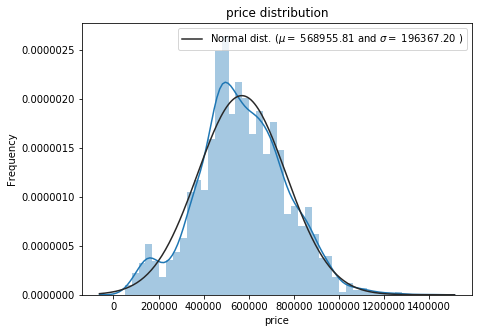

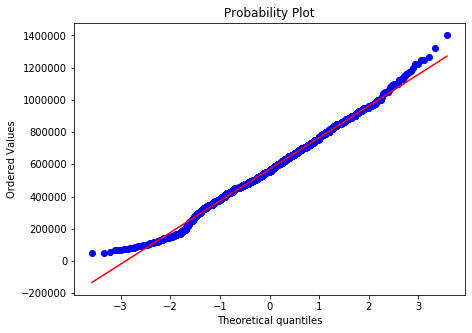

In [128]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [129]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


**Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается.**

In [130]:
# Также создадим фрейм df для удобства

df = auto_data.copy()

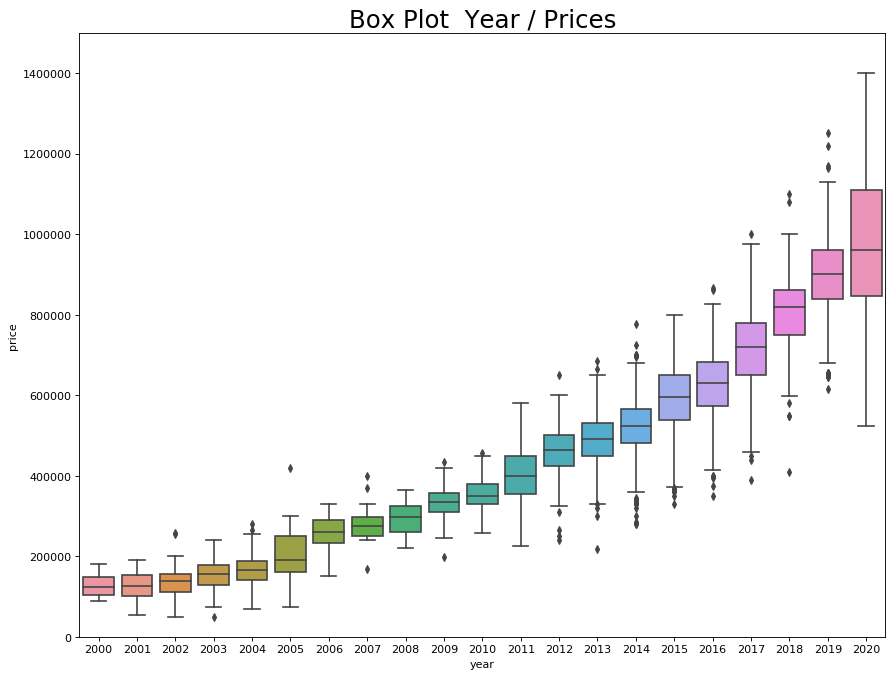

In [131]:
# Постоим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

**Выбросы пока не удаляем.**

In [132]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df.copy()

### Итого, мы имеем три набора данных с разных сайтов

In [133]:
auto_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [134]:
drom_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000


In [135]:
avito_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000


### Объединим все три набора в один

In [136]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [137]:
new_df.shape

(6251, 8)

In [138]:
# удалим дубликаты, на разных сайтах объявления могут совпадать

new_df = new_df.drop_duplicates()

In [139]:
new_df.shape

(6012, 8)

**Итак, мы получили один итоговый набор данных, соединив три фрейма с разных площадок.**

In [140]:
df = new_df.copy()


 mu = 571229.91 and sigma = 196229.88



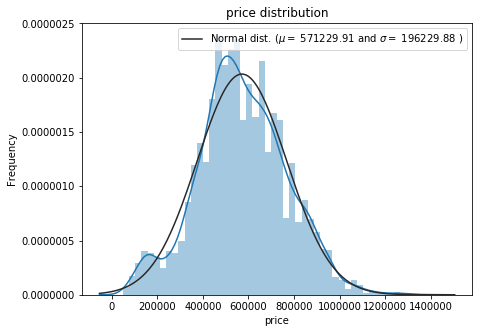

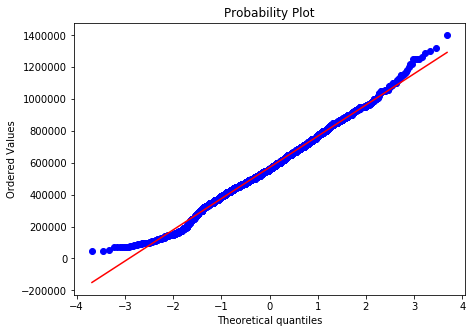

In [142]:
# Посмотрим, как распределена цена

plt.rcParams['figure.figsize']=(7,5)
sns.distplot(df['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

In [143]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 0.085451
Kurtosis: 0.129021


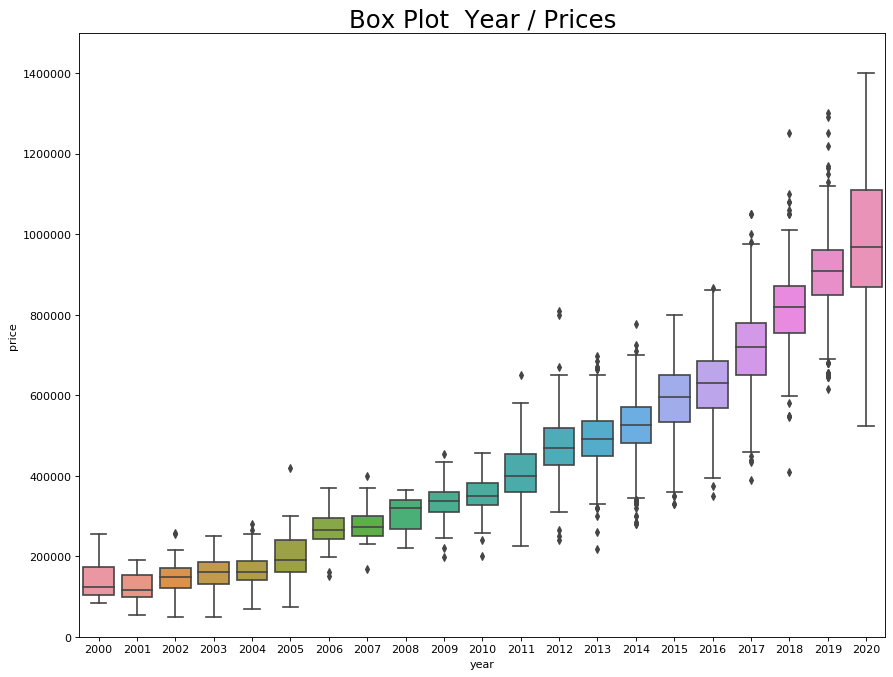

In [144]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

# Алгоритм CatBoost

**Назначаем X и y**

In [145]:
X = df.drop(['price'], axis=1)
y = df['price']

**Подберем гиперпараметры регрессора, используя кроссвалидацию. Разобъем данные на тренировочные и тестовые, test_size=0.25**

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3, 4, 5, 6],
              'learning_rate' : [0.01, 0.03, 0.05],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs=-1, verbose=True)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.7min finished


0:	learn: 192273.7234715	total: 50.4ms	remaining: 40.3s
1:	learn: 187766.5407100	total: 56.6ms	remaining: 22.6s
2:	learn: 183291.8818347	total: 61.7ms	remaining: 16.4s
3:	learn: 179217.9024269	total: 67.6ms	remaining: 13.4s
4:	learn: 175071.7371806	total: 74.5ms	remaining: 11.8s
5:	learn: 171003.3938531	total: 80.1ms	remaining: 10.6s
6:	learn: 167043.9832554	total: 85.3ms	remaining: 9.66s
7:	learn: 163269.2448986	total: 90ms	remaining: 8.91s
8:	learn: 159496.4048412	total: 94.7ms	remaining: 8.32s
9:	learn: 155925.0694200	total: 99.3ms	remaining: 7.84s
10:	learn: 152501.5076972	total: 104ms	remaining: 7.46s
11:	learn: 149312.8233153	total: 109ms	remaining: 7.13s
12:	learn: 146143.8713083	total: 113ms	remaining: 6.81s
13:	learn: 143094.2155993	total: 117ms	remaining: 6.57s
14:	learn: 140104.5818820	total: 122ms	remaining: 6.37s
15:	learn: 137085.6676198	total: 126ms	remaining: 6.17s
16:	learn: 134287.6124145	total: 131ms	remaining: 6.04s
17:	learn: 131607.1742108	total: 136ms	remaining: 

152:	learn: 56025.2476167	total: 729ms	remaining: 3.08s
153:	learn: 55972.6271970	total: 733ms	remaining: 3.07s
154:	learn: 55930.8756615	total: 738ms	remaining: 3.07s
155:	learn: 55890.9838110	total: 743ms	remaining: 3.07s
156:	learn: 55866.1549739	total: 747ms	remaining: 3.06s
157:	learn: 55830.7859710	total: 780ms	remaining: 3.17s
158:	learn: 55812.6642803	total: 785ms	remaining: 3.16s
159:	learn: 55796.7755066	total: 789ms	remaining: 3.15s
160:	learn: 55760.7863693	total: 793ms	remaining: 3.15s
161:	learn: 55737.7102478	total: 796ms	remaining: 3.13s
162:	learn: 55696.1719986	total: 799ms	remaining: 3.12s
163:	learn: 55653.3022127	total: 803ms	remaining: 3.12s
164:	learn: 55626.2593647	total: 807ms	remaining: 3.11s
165:	learn: 55611.0083068	total: 811ms	remaining: 3.1s
166:	learn: 55574.8915549	total: 817ms	remaining: 3.1s
167:	learn: 55552.3957500	total: 821ms	remaining: 3.09s
168:	learn: 55519.0232331	total: 824ms	remaining: 3.08s
169:	learn: 55502.5501271	total: 829ms	remaining: 

305:	learn: 53617.7943702	total: 1.41s	remaining: 2.27s
306:	learn: 53597.3896361	total: 1.41s	remaining: 2.27s
307:	learn: 53591.5748346	total: 1.42s	remaining: 2.26s
308:	learn: 53577.1756448	total: 1.42s	remaining: 2.26s
309:	learn: 53574.6307538	total: 1.43s	remaining: 2.25s
310:	learn: 53565.2895449	total: 1.43s	remaining: 2.25s
311:	learn: 53562.8641431	total: 1.44s	remaining: 2.24s
312:	learn: 53558.6427688	total: 1.44s	remaining: 2.24s
313:	learn: 53543.0403542	total: 1.44s	remaining: 2.23s
314:	learn: 53538.0348786	total: 1.45s	remaining: 2.23s
315:	learn: 53529.8001568	total: 1.45s	remaining: 2.23s
316:	learn: 53527.7203167	total: 1.46s	remaining: 2.22s
317:	learn: 53518.4050353	total: 1.46s	remaining: 2.21s
318:	learn: 53506.8589515	total: 1.46s	remaining: 2.21s
319:	learn: 53490.9966877	total: 1.47s	remaining: 2.21s
320:	learn: 53486.8630993	total: 1.48s	remaining: 2.2s
321:	learn: 53478.8313719	total: 1.48s	remaining: 2.19s
322:	learn: 53466.3738422	total: 1.48s	remaining:

461:	learn: 52437.9347232	total: 2.09s	remaining: 1.53s
462:	learn: 52437.5767226	total: 2.09s	remaining: 1.52s
463:	learn: 52436.4264771	total: 2.1s	remaining: 1.52s
464:	learn: 52429.3290499	total: 2.1s	remaining: 1.51s
465:	learn: 52427.1895938	total: 2.1s	remaining: 1.51s
466:	learn: 52424.7469949	total: 2.11s	remaining: 1.5s
467:	learn: 52415.9509335	total: 2.11s	remaining: 1.5s
468:	learn: 52407.3822270	total: 2.12s	remaining: 1.49s
469:	learn: 52402.2328051	total: 2.12s	remaining: 1.49s
470:	learn: 52396.2980213	total: 2.13s	remaining: 1.49s
471:	learn: 52393.3183395	total: 2.13s	remaining: 1.48s
472:	learn: 52391.9800535	total: 2.13s	remaining: 1.47s
473:	learn: 52387.3717543	total: 2.13s	remaining: 1.47s
474:	learn: 52380.2883627	total: 2.14s	remaining: 1.46s
475:	learn: 52370.5621662	total: 2.15s	remaining: 1.46s
476:	learn: 52366.2989222	total: 2.15s	remaining: 1.46s
477:	learn: 52359.9377455	total: 2.16s	remaining: 1.45s
478:	learn: 52351.0121117	total: 2.16s	remaining: 1.4

608:	learn: 51708.0293789	total: 2.77s	remaining: 870ms
609:	learn: 51701.3391470	total: 2.78s	remaining: 865ms
610:	learn: 51698.5092767	total: 2.78s	remaining: 860ms
611:	learn: 51694.8449886	total: 2.78s	remaining: 855ms
612:	learn: 51691.1609738	total: 2.79s	remaining: 851ms
613:	learn: 51685.0312764	total: 2.79s	remaining: 846ms
614:	learn: 51683.1767748	total: 2.79s	remaining: 841ms
615:	learn: 51676.6633886	total: 2.8s	remaining: 836ms
616:	learn: 51668.5964200	total: 2.8s	remaining: 831ms
617:	learn: 51667.4679479	total: 2.8s	remaining: 826ms
618:	learn: 51665.7661139	total: 2.81s	remaining: 821ms
619:	learn: 51661.9550830	total: 2.81s	remaining: 817ms
620:	learn: 51650.1006571	total: 2.82s	remaining: 812ms
621:	learn: 51647.7355056	total: 2.82s	remaining: 808ms
622:	learn: 51647.0625133	total: 2.83s	remaining: 804ms
623:	learn: 51645.8407630	total: 2.83s	remaining: 799ms
624:	learn: 51645.1110306	total: 2.84s	remaining: 795ms
625:	learn: 51640.6949518	total: 2.84s	remaining: 7

763:	learn: 51147.7393200	total: 3.47s	remaining: 163ms
764:	learn: 51146.0278656	total: 3.48s	remaining: 159ms
765:	learn: 51142.0196362	total: 3.48s	remaining: 154ms
766:	learn: 51141.2337570	total: 3.49s	remaining: 150ms
767:	learn: 51138.4305069	total: 3.49s	remaining: 145ms
768:	learn: 51133.9493452	total: 3.5s	remaining: 141ms
769:	learn: 51132.1928698	total: 3.5s	remaining: 136ms
770:	learn: 51132.0872151	total: 3.5s	remaining: 132ms
771:	learn: 51129.3060392	total: 3.5s	remaining: 127ms
772:	learn: 51124.6295243	total: 3.51s	remaining: 123ms
773:	learn: 51122.3366124	total: 3.51s	remaining: 118ms
774:	learn: 51119.2200126	total: 3.52s	remaining: 114ms
775:	learn: 51114.8389241	total: 3.52s	remaining: 109ms
776:	learn: 51113.5352611	total: 3.53s	remaining: 104ms
777:	learn: 51109.5174718	total: 3.53s	remaining: 99.8ms
778:	learn: 51107.8786311	total: 3.53s	remaining: 95.3ms
779:	learn: 51105.5118094	total: 3.54s	remaining: 90.7ms
780:	learn: 51103.5061891	total: 3.54s	remaining:

In [147]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=5)

In [148]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 192273.7234715	total: 6.12ms	remaining: 4.89s
1:	learn: 187766.5407100	total: 12.7ms	remaining: 5.08s
2:	learn: 183291.8818347	total: 17.8ms	remaining: 4.74s
3:	learn: 179217.9024269	total: 23.1ms	remaining: 4.6s
4:	learn: 175071.7371806	total: 91.7ms	remaining: 14.6s
5:	learn: 171003.3938531	total: 97.4ms	remaining: 12.9s
6:	learn: 167043.9832554	total: 103ms	remaining: 11.7s
7:	learn: 163269.2448986	total: 148ms	remaining: 14.7s
8:	learn: 159496.4048412	total: 154ms	remaining: 13.5s
9:	learn: 155925.0694200	total: 163ms	remaining: 12.9s
10:	learn: 152501.5076972	total: 168ms	remaining: 12.1s
11:	learn: 149312.8233153	total: 174ms	remaining: 11.4s
12:	learn: 146143.8713083	total: 178ms	remaining: 10.8s
13:	learn: 143094.2155993	total: 217ms	remaining: 12.2s
14:	learn: 140104.5818820	total: 224ms	remaining: 11.7s
15:	learn: 137085.6676198	total: 231ms	remaining: 11.3s
16:	learn: 134287.6124145	total: 236ms	remaining: 10.9s
17:	learn: 131607.1742108	total: 240ms	remaining: 10.

178:	learn: 55274.0089981	total: 1.23s	remaining: 4.26s
179:	learn: 55235.3545302	total: 1.23s	remaining: 4.25s
180:	learn: 55224.3811843	total: 1.23s	remaining: 4.22s
181:	learn: 55192.4136407	total: 1.24s	remaining: 4.21s
182:	learn: 55169.0206682	total: 1.24s	remaining: 4.2s
183:	learn: 55135.3564378	total: 1.25s	remaining: 4.18s
184:	learn: 55109.0436370	total: 1.25s	remaining: 4.17s
185:	learn: 55101.6474838	total: 1.26s	remaining: 4.15s
186:	learn: 55080.5501444	total: 1.26s	remaining: 4.13s
187:	learn: 55063.3631868	total: 1.26s	remaining: 4.12s
188:	learn: 55049.5377324	total: 1.27s	remaining: 4.12s
189:	learn: 55026.6604356	total: 1.28s	remaining: 4.11s
190:	learn: 55004.8565102	total: 1.28s	remaining: 4.1s
191:	learn: 54993.0931255	total: 1.29s	remaining: 4.08s
192:	learn: 54966.1783128	total: 1.29s	remaining: 4.06s
193:	learn: 54946.0999816	total: 1.29s	remaining: 4.04s
194:	learn: 54934.0028476	total: 1.3s	remaining: 4.03s
195:	learn: 54921.3413828	total: 1.3s	remaining: 4.

352:	learn: 53191.5832045	total: 2.09s	remaining: 2.65s
353:	learn: 53190.7426171	total: 2.09s	remaining: 2.64s
354:	learn: 53181.7159591	total: 2.1s	remaining: 2.63s
355:	learn: 53174.1403376	total: 2.1s	remaining: 2.63s
356:	learn: 53165.7252128	total: 2.11s	remaining: 2.62s
357:	learn: 53157.0046838	total: 2.13s	remaining: 2.63s
358:	learn: 53149.2868191	total: 2.13s	remaining: 2.62s
359:	learn: 53139.8373882	total: 2.13s	remaining: 2.61s
360:	learn: 53128.6546639	total: 2.14s	remaining: 2.6s
361:	learn: 53114.4923479	total: 2.14s	remaining: 2.59s
362:	learn: 53109.1599410	total: 2.15s	remaining: 2.58s
363:	learn: 53100.3394112	total: 2.15s	remaining: 2.58s
364:	learn: 53096.9796299	total: 2.16s	remaining: 2.57s
365:	learn: 53092.3860198	total: 2.16s	remaining: 2.56s
366:	learn: 53083.6052176	total: 2.17s	remaining: 2.56s
367:	learn: 53075.5902695	total: 2.17s	remaining: 2.55s
368:	learn: 53065.9353637	total: 2.18s	remaining: 2.54s
369:	learn: 53053.9251977	total: 2.18s	remaining: 2

529:	learn: 52108.8246265	total: 2.95s	remaining: 1.5s
530:	learn: 52103.6615371	total: 2.96s	remaining: 1.5s
531:	learn: 52097.9297978	total: 2.96s	remaining: 1.49s
532:	learn: 52097.4800969	total: 2.97s	remaining: 1.49s
533:	learn: 52094.4660080	total: 2.98s	remaining: 1.48s
534:	learn: 52084.6838441	total: 2.98s	remaining: 1.48s
535:	learn: 52082.3318710	total: 2.99s	remaining: 1.47s
536:	learn: 52078.5770803	total: 2.99s	remaining: 1.47s
537:	learn: 52071.3110313	total: 3s	remaining: 1.46s
538:	learn: 52069.9671030	total: 3s	remaining: 1.45s
539:	learn: 52066.3374107	total: 3.01s	remaining: 1.45s
540:	learn: 52061.8958556	total: 3.01s	remaining: 1.44s
541:	learn: 52061.7765767	total: 3.01s	remaining: 1.44s
542:	learn: 52055.1569064	total: 3.02s	remaining: 1.43s
543:	learn: 52047.8537940	total: 3.03s	remaining: 1.43s
544:	learn: 52041.2606718	total: 3.04s	remaining: 1.42s
545:	learn: 52036.2366007	total: 3.06s	remaining: 1.42s
546:	learn: 52033.7988576	total: 3.07s	remaining: 1.42s


676:	learn: 51429.9288195	total: 3.81s	remaining: 691ms
677:	learn: 51422.9315938	total: 3.81s	remaining: 685ms
678:	learn: 51415.2013832	total: 3.82s	remaining: 680ms
679:	learn: 51410.7340803	total: 3.82s	remaining: 675ms
680:	learn: 51404.4600610	total: 3.83s	remaining: 669ms
681:	learn: 51400.6720164	total: 3.84s	remaining: 664ms
682:	learn: 51398.4412625	total: 3.84s	remaining: 658ms
683:	learn: 51395.4690566	total: 3.85s	remaining: 653ms
684:	learn: 51392.2794876	total: 3.85s	remaining: 647ms
685:	learn: 51385.7922707	total: 3.86s	remaining: 641ms
686:	learn: 51381.9127208	total: 3.86s	remaining: 635ms
687:	learn: 51376.7469749	total: 3.87s	remaining: 629ms
688:	learn: 51371.2038198	total: 3.87s	remaining: 623ms
689:	learn: 51366.7266362	total: 3.87s	remaining: 617ms
690:	learn: 51358.8603112	total: 3.88s	remaining: 612ms
691:	learn: 51358.5189236	total: 3.88s	remaining: 605ms
692:	learn: 51356.9559144	total: 3.88s	remaining: 600ms
693:	learn: 51354.7878619	total: 3.89s	remaining

In [149]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [150]:
# Вычисляем ошибку

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 58868.688960


### Теперь удалим выбросы и посмотрим, как изменится RMSE

In [151]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

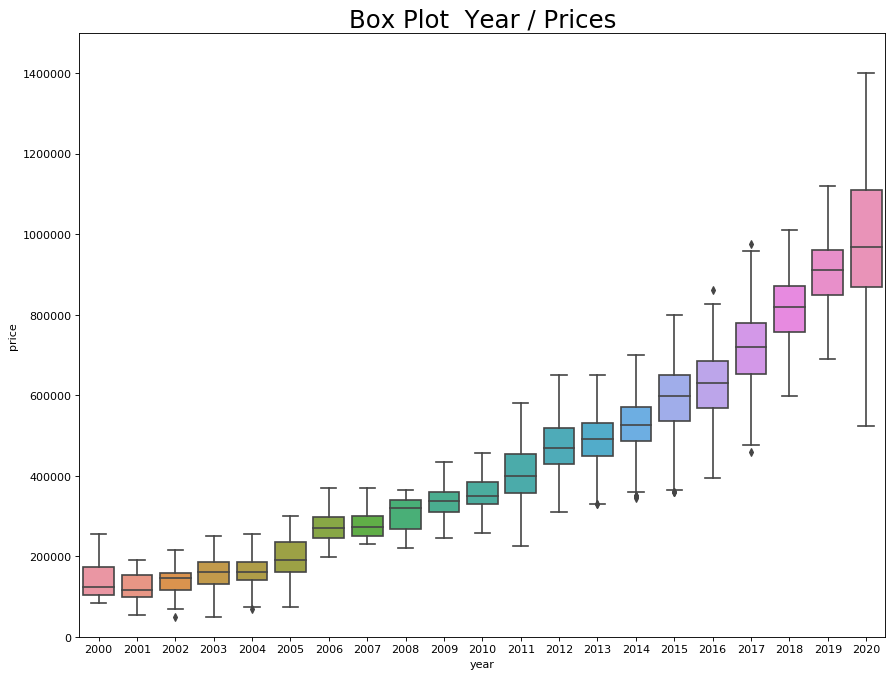

In [152]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [153]:
# еще раз удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

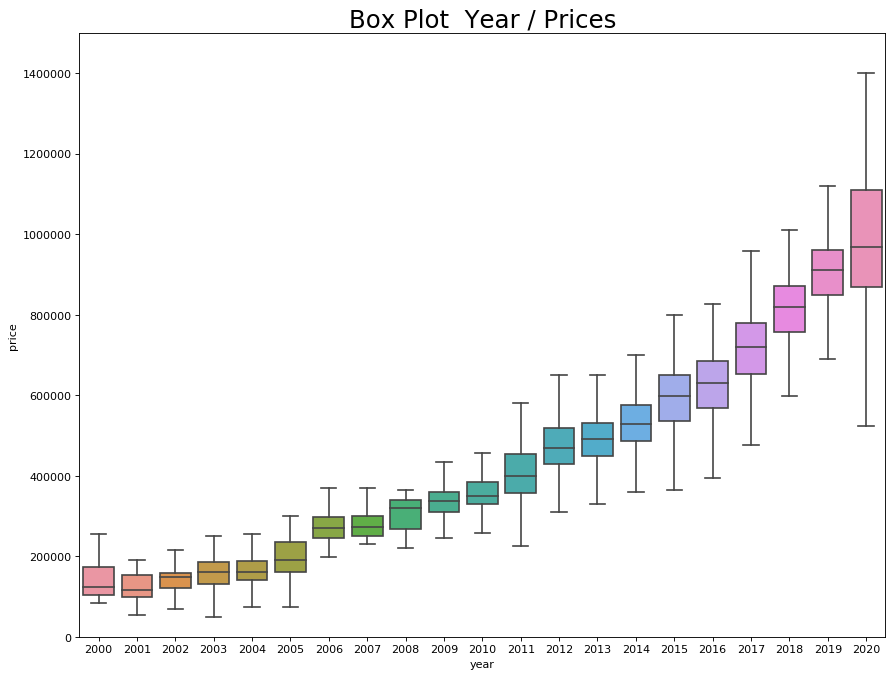

In [154]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

**Все выбросы удалились. Применим алгоритм CatBoost еще раз.**

In [155]:
X = df.drop(['price'], axis=1)
y = df['price']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [4, 5, 6, 7],
              'learning_rate' : [0.01, 0.03, 0.05],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1, 1.2]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs=-1, verbose=True)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  6.2min finished


0:	learn: 188138.6382756	total: 7.38ms	remaining: 5.9s
1:	learn: 183640.2279820	total: 14.7ms	remaining: 5.85s
2:	learn: 179306.8407840	total: 19.4ms	remaining: 5.17s
3:	learn: 174951.8826347	total: 27.7ms	remaining: 5.52s
4:	learn: 170976.0211097	total: 33.4ms	remaining: 5.32s
5:	learn: 166927.1719497	total: 40.5ms	remaining: 5.36s
6:	learn: 162958.4046534	total: 47.1ms	remaining: 5.33s
7:	learn: 159134.3461008	total: 54.1ms	remaining: 5.36s
8:	learn: 155397.5058089	total: 61.9ms	remaining: 5.44s
9:	learn: 151722.9649254	total: 68.4ms	remaining: 5.4s
10:	learn: 148281.5438290	total: 75.3ms	remaining: 5.4s
11:	learn: 144994.0174481	total: 84.1ms	remaining: 5.52s
12:	learn: 141814.0153720	total: 110ms	remaining: 6.65s
13:	learn: 138582.2483508	total: 122ms	remaining: 6.82s
14:	learn: 135523.4738307	total: 130ms	remaining: 6.81s
15:	learn: 132664.9753605	total: 140ms	remaining: 6.86s
16:	learn: 129896.5670567	total: 154ms	remaining: 7.09s
17:	learn: 127133.0337631	total: 160ms	remaining:

162:	learn: 52131.6473338	total: 1.25s	remaining: 4.89s
163:	learn: 52118.3505061	total: 1.26s	remaining: 4.87s
164:	learn: 52081.4261944	total: 1.26s	remaining: 4.85s
165:	learn: 52049.8416494	total: 1.28s	remaining: 4.89s
166:	learn: 52036.5667444	total: 1.31s	remaining: 4.95s
167:	learn: 52024.7535890	total: 1.31s	remaining: 4.93s
168:	learn: 51985.0938268	total: 1.32s	remaining: 4.95s
169:	learn: 51968.9497734	total: 1.33s	remaining: 4.94s
170:	learn: 51946.5342694	total: 1.34s	remaining: 4.94s
171:	learn: 51933.1582597	total: 1.34s	remaining: 4.91s
172:	learn: 51917.9594460	total: 1.35s	remaining: 4.89s
173:	learn: 51896.5902889	total: 1.36s	remaining: 4.88s
174:	learn: 51886.3130316	total: 1.36s	remaining: 4.86s
175:	learn: 51868.2262662	total: 1.36s	remaining: 4.84s
176:	learn: 51844.6599127	total: 1.37s	remaining: 4.82s
177:	learn: 51817.1166680	total: 1.37s	remaining: 4.8s
178:	learn: 51797.7982137	total: 1.38s	remaining: 4.79s
179:	learn: 51790.2294931	total: 1.38s	remaining:

341:	learn: 50340.8577801	total: 2.28s	remaining: 3.05s
342:	learn: 50330.6872456	total: 2.28s	remaining: 3.04s
343:	learn: 50321.6212434	total: 2.29s	remaining: 3.03s
344:	learn: 50316.5198068	total: 2.3s	remaining: 3.03s
345:	learn: 50310.1423142	total: 2.31s	remaining: 3.02s
346:	learn: 50308.4456710	total: 2.31s	remaining: 3.02s
347:	learn: 50298.1838567	total: 2.31s	remaining: 3.01s
348:	learn: 50285.2874245	total: 2.32s	remaining: 3s
349:	learn: 50284.3710186	total: 2.32s	remaining: 2.99s
350:	learn: 50277.9999132	total: 2.33s	remaining: 2.98s
351:	learn: 50270.9122460	total: 2.33s	remaining: 2.97s
352:	learn: 50264.6212690	total: 2.34s	remaining: 2.96s
353:	learn: 50260.2029717	total: 2.34s	remaining: 2.95s
354:	learn: 50255.6435995	total: 2.35s	remaining: 2.94s
355:	learn: 50249.7290521	total: 2.36s	remaining: 2.94s
356:	learn: 50243.2612338	total: 2.36s	remaining: 2.93s
357:	learn: 50230.9727168	total: 2.37s	remaining: 2.92s
358:	learn: 50225.3457811	total: 2.38s	remaining: 2.

517:	learn: 49374.6084240	total: 3.14s	remaining: 1.71s
518:	learn: 49370.3044150	total: 3.14s	remaining: 1.7s
519:	learn: 49364.9938802	total: 3.15s	remaining: 1.69s
520:	learn: 49361.8968085	total: 3.15s	remaining: 1.69s
521:	learn: 49353.8526194	total: 3.15s	remaining: 1.68s
522:	learn: 49347.7469617	total: 3.16s	remaining: 1.67s
523:	learn: 49345.7272565	total: 3.16s	remaining: 1.66s
524:	learn: 49341.3499484	total: 3.16s	remaining: 1.66s
525:	learn: 49336.9527365	total: 3.17s	remaining: 1.65s
526:	learn: 49331.8399709	total: 3.17s	remaining: 1.64s
527:	learn: 49327.6723151	total: 3.17s	remaining: 1.63s
528:	learn: 49320.6190899	total: 3.17s	remaining: 1.63s
529:	learn: 49317.6681288	total: 3.18s	remaining: 1.62s
530:	learn: 49311.6599414	total: 3.18s	remaining: 1.61s
531:	learn: 49304.1693455	total: 3.19s	remaining: 1.6s
532:	learn: 49300.2948302	total: 3.19s	remaining: 1.6s
533:	learn: 49296.1297060	total: 3.2s	remaining: 1.59s
534:	learn: 49293.3163144	total: 3.22s	remaining: 1.

699:	learn: 48600.6968950	total: 3.99s	remaining: 571ms
700:	learn: 48595.3868198	total: 4s	remaining: 565ms
701:	learn: 48591.0120470	total: 4s	remaining: 559ms
702:	learn: 48588.1512361	total: 4.01s	remaining: 553ms
703:	learn: 48581.5605814	total: 4.02s	remaining: 548ms
704:	learn: 48577.7881444	total: 4.02s	remaining: 542ms
705:	learn: 48573.0840699	total: 4.02s	remaining: 536ms
706:	learn: 48568.8512250	total: 4.03s	remaining: 530ms
707:	learn: 48563.9711421	total: 4.03s	remaining: 524ms
708:	learn: 48559.4441738	total: 4.04s	remaining: 518ms
709:	learn: 48553.7902105	total: 4.04s	remaining: 513ms
710:	learn: 48546.9866929	total: 4.05s	remaining: 507ms
711:	learn: 48543.0713916	total: 4.05s	remaining: 501ms
712:	learn: 48538.4396827	total: 4.06s	remaining: 496ms
713:	learn: 48531.7541437	total: 4.07s	remaining: 490ms
714:	learn: 48528.1759202	total: 4.07s	remaining: 484ms
715:	learn: 48521.9133595	total: 4.08s	remaining: 478ms
716:	learn: 48517.3262522	total: 4.08s	remaining: 472m

In [157]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=6)

In [158]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 188138.6382756	total: 8.56ms	remaining: 6.84s
1:	learn: 183640.2279820	total: 15.4ms	remaining: 6.14s
2:	learn: 179306.8407840	total: 20.4ms	remaining: 5.41s
3:	learn: 174951.8826347	total: 27.8ms	remaining: 5.53s
4:	learn: 170976.0211097	total: 33.8ms	remaining: 5.38s
5:	learn: 166927.1719497	total: 61ms	remaining: 8.07s
6:	learn: 162958.4046534	total: 69ms	remaining: 7.81s
7:	learn: 159134.3461008	total: 77.5ms	remaining: 7.67s
8:	learn: 155397.5058089	total: 84.5ms	remaining: 7.42s
9:	learn: 151722.9649254	total: 95.1ms	remaining: 7.51s
10:	learn: 148281.5438290	total: 102ms	remaining: 7.32s
11:	learn: 144994.0174481	total: 122ms	remaining: 8.02s
12:	learn: 141814.0153720	total: 150ms	remaining: 9.1s
13:	learn: 138582.2483508	total: 156ms	remaining: 8.78s
14:	learn: 135523.4738307	total: 163ms	remaining: 8.53s
15:	learn: 132664.9753605	total: 172ms	remaining: 8.42s
16:	learn: 129896.5670567	total: 180ms	remaining: 8.27s
17:	learn: 127133.0337631	total: 186ms	remaining: 8.0

150:	learn: 52502.6490612	total: 1.25s	remaining: 5.36s
151:	learn: 52463.4282629	total: 1.25s	remaining: 5.34s
152:	learn: 52418.0031974	total: 1.26s	remaining: 5.32s
153:	learn: 52395.6610111	total: 1.26s	remaining: 5.31s
154:	learn: 52366.4308775	total: 1.27s	remaining: 5.3s
155:	learn: 52333.7942934	total: 1.29s	remaining: 5.32s
156:	learn: 52313.2332285	total: 1.29s	remaining: 5.3s
157:	learn: 52278.8936885	total: 1.3s	remaining: 5.29s
158:	learn: 52253.0565258	total: 1.31s	remaining: 5.27s
159:	learn: 52221.0707392	total: 1.31s	remaining: 5.26s
160:	learn: 52191.0424536	total: 1.32s	remaining: 5.25s
161:	learn: 52149.8363350	total: 1.33s	remaining: 5.23s
162:	learn: 52131.6473338	total: 1.33s	remaining: 5.21s
163:	learn: 52118.3505061	total: 1.33s	remaining: 5.18s
164:	learn: 52081.4261944	total: 1.34s	remaining: 5.16s
165:	learn: 52049.8416494	total: 1.34s	remaining: 5.14s
166:	learn: 52036.5667444	total: 1.35s	remaining: 5.12s
167:	learn: 52024.7535890	total: 1.36s	remaining: 5

308:	learn: 50546.0621698	total: 2.12s	remaining: 3.36s
309:	learn: 50544.6215879	total: 2.12s	remaining: 3.35s
310:	learn: 50532.7035839	total: 2.12s	remaining: 3.34s
311:	learn: 50521.8071143	total: 2.13s	remaining: 3.33s
312:	learn: 50515.4566525	total: 2.13s	remaining: 3.32s
313:	learn: 50509.2128824	total: 2.14s	remaining: 3.32s
314:	learn: 50506.1531860	total: 2.16s	remaining: 3.32s
315:	learn: 50499.9147667	total: 2.17s	remaining: 3.32s
316:	learn: 50495.6471473	total: 2.18s	remaining: 3.32s
317:	learn: 50488.9209994	total: 2.19s	remaining: 3.32s
318:	learn: 50482.2564424	total: 2.24s	remaining: 3.38s
319:	learn: 50471.8023605	total: 2.26s	remaining: 3.4s
320:	learn: 50462.1496004	total: 2.31s	remaining: 3.45s
321:	learn: 50450.8659074	total: 2.35s	remaining: 3.48s
322:	learn: 50444.7138701	total: 2.36s	remaining: 3.49s
323:	learn: 50435.5123596	total: 2.42s	remaining: 3.55s
324:	learn: 50435.2321583	total: 2.46s	remaining: 3.59s
325:	learn: 50425.5385940	total: 2.47s	remaining:

471:	learn: 49632.6549100	total: 3.18s	remaining: 2.21s
472:	learn: 49624.0394330	total: 3.18s	remaining: 2.2s
473:	learn: 49617.4986772	total: 3.19s	remaining: 2.19s
474:	learn: 49615.6724799	total: 3.19s	remaining: 2.18s
475:	learn: 49610.1665800	total: 3.2s	remaining: 2.18s
476:	learn: 49603.8030260	total: 3.2s	remaining: 2.17s
477:	learn: 49596.2303730	total: 3.21s	remaining: 2.16s
478:	learn: 49587.8964658	total: 3.21s	remaining: 2.15s
479:	learn: 49581.7049905	total: 3.21s	remaining: 2.14s
480:	learn: 49577.5747629	total: 3.22s	remaining: 2.13s
481:	learn: 49574.5900590	total: 3.23s	remaining: 2.13s
482:	learn: 49569.0628888	total: 3.23s	remaining: 2.12s
483:	learn: 49559.7747288	total: 3.24s	remaining: 2.11s
484:	learn: 49556.6183741	total: 3.24s	remaining: 2.1s
485:	learn: 49553.5250506	total: 3.25s	remaining: 2.1s
486:	learn: 49550.9390002	total: 3.25s	remaining: 2.09s
487:	learn: 49547.0870970	total: 3.25s	remaining: 2.08s
488:	learn: 49544.8937386	total: 3.25s	remaining: 2.0

646:	learn: 48827.2607035	total: 4.03s	remaining: 954ms
647:	learn: 48822.2940699	total: 4.04s	remaining: 947ms
648:	learn: 48811.5316854	total: 4.05s	remaining: 942ms
649:	learn: 48806.7027845	total: 4.05s	remaining: 935ms
650:	learn: 48802.0107816	total: 4.06s	remaining: 930ms
651:	learn: 48800.6114560	total: 4.07s	remaining: 924ms
652:	learn: 48795.4971274	total: 4.08s	remaining: 917ms
653:	learn: 48788.1941891	total: 4.08s	remaining: 911ms
654:	learn: 48785.1344036	total: 4.09s	remaining: 905ms
655:	learn: 48780.6233460	total: 4.1s	remaining: 899ms
656:	learn: 48775.9388272	total: 4.1s	remaining: 892ms
657:	learn: 48773.1801312	total: 4.11s	remaining: 886ms
658:	learn: 48764.9890298	total: 4.11s	remaining: 880ms
659:	learn: 48761.6472651	total: 4.12s	remaining: 873ms
660:	learn: 48755.9907135	total: 4.12s	remaining: 866ms
661:	learn: 48748.0562439	total: 4.13s	remaining: 860ms
662:	learn: 48742.8913073	total: 4.13s	remaining: 854ms
663:	learn: 48735.1720561	total: 4.14s	remaining: 

In [159]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [160]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53783.079431


**Ошибка уменьшилась на 5085 руб (была 58868.688960), модель без выбросов существенно точнее.**

In [161]:
# сохраним полученные данные в файл .csv

df.to_csv('C:\\Users\\user1174\\Downloads\\AutoRU_project\\df.csv')

### Посмотрим для интереса стоимость моего автомобиля

In [162]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [163]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [164]:
# Получаем предсказание

my_preds = model.predict(my_df)

In [165]:
my_preds

array([671785.86559848])

**Итак, мы получили цену 671785.87 рублей.**

**Для сравнения нашего предсказания обратимся к сайту robasta.ru, где за 99 рублей можно получить цену на авто**
**Данный сервис работает на алгоритме Random Forest. Сведения можно получить [тут](https://habr.com/ru/post/312842/)**

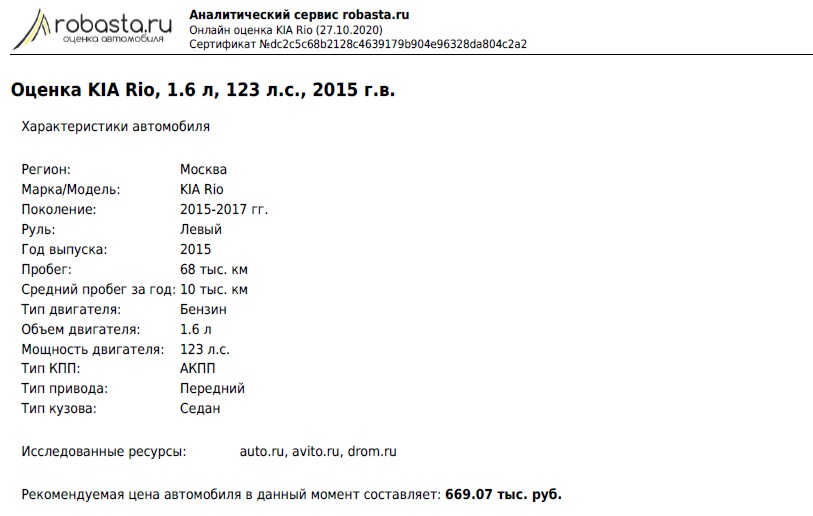

In [199]:
# Вот отчет с этого сайта

from IPython.display import Image
Image('C:\\Users\\user1174\\Downloads\\AutoRU_project\\robasta_kia.jpg')

**Мы получили хороший результат!**

------------------------------------------------------------------------------------------------------
## Применим к нашей задаче несколько других алгоритмов

In [167]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
4,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000
5,Kia Rio III,2012,159995,седан,123,автоматическая,1 владелец,445000


**В нашем фрейме присутствуют категориальные данные (колонки 'model', 'body_type', 'transmission', 'owners_count').
Алгоритм CatBoost позволял нам работать с такими данными без преобразований, просто нужно было указать на эти столбцы, как на категориальные. Для других алгоритмов регрессии, которые мы будем применять ниже, необходимо произвести one-hot кодирование данных признаков.**

In [168]:
for i in ['model', 'body_type', 'transmission', 'owners_count']:
    one_hot = pd.get_dummies(df[i])
    df = df.drop(i, axis = 1)
    df = df.join(one_hot)

In [169]:
df.head(3)

,year,km_age,engine_power,price,Kia Rio I,Kia Rio I Рестайлинг,Kia Rio II,Kia Rio II Рестайлинг,Kia Rio III,Kia Rio III Рестайлинг,...,Kia Rio IV X-Line,Kia Rio IV Рестайлинг,седан,универсал 5 дв.,хэтчбек 5 дв.,автоматическая,механическая,1 владелец,2 владельца,3 или более
0,2017,57000,123,770000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,2016,19086,123,709000,0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
2,2017,105860,123,695000,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0


**Назначаем X и y**

In [170]:
X = df.drop(['price'], axis=1)
y = df['price']

## Алгоритм XGBoost

**Подберем параметры регрессора, используя поиск по сетке с кроссвалидацией, разделим данные на тренировочные и тестовые, test_size=0.25**

In [171]:
import xgboost as xgb
from sklearn import preprocessing
from xgboost.sklearn import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.02, 0.03, 0.05],
              'max_depth': [3, 4, 5],
              'min_child_weight': [5, 6, 7, 8],
              'silent': [1],
              'subsample': [0.3, 0.5, 0.6],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 800]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs = -1, verbose=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  8.8min finished


0.924028188718519
{'colsample_bytree': 0.7, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.5}


In [172]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [173]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          nthread = 4,
                          silent = 1,
                          min_child_weight = 6,
                          colsample_bytree = 0.7,
                          subsample = 0.5,
                          learning_rate = 0.02,
                          max_depth = 4,  
                          n_estimators = 500)

In [174]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.5, verbosity=1)

In [175]:
# Делаем предсказание на тестовом наборе

preds = xg_reg.predict(X_test)

In [176]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52461.062263


In [177]:
params = {'objective':'reg:linear',
          'nthread': 4,
          'silent' : 1,
          'min_child_weight' : 6,
          'colsample_bytree' : 0.7,
          'subsample' : 0.5,
          'learning_rate' : 0.02,
          'max_depth' : 4,  
          'n_estimators' : 500,
          'alpha': 10}

In [178]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

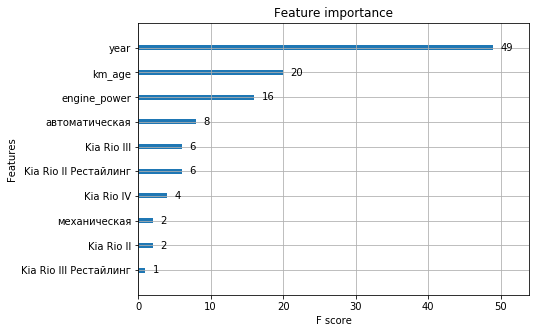

In [179]:
# Важность влияния признаков на модель

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]

**Предскажем цену на мой автомобиль**

In [180]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'year': [2015],
                      'km_age': [68000],
                      'engine_power': [123],       
                      'Kia Rio I': [0],
                      'Kia Rio I Рестайлинг': [0],
                      'Kia Rio II': [0],
                      'Kia Rio II Рестайлинг': [0], 
                      'Kia Rio III': [0], 
                      'Kia Rio III Рестайлинг': [1],
                      'Kia Rio IV': [0], 
                      'Kia Rio IV X-Line': [0],
                      'Kia Rio IV Рестайлинг': [0],
                      'седан': [1],
                      'универсал 5 дв.': [0],
                      'хэтчбек 5 дв.': [0],
                      'автоматическая': [1],
                      'механическая': [0],
                      '1 владелец': [1],
                      '2 владельца': [0],
                      '3 или более': [0]
                        })

In [181]:
my_df

,year,km_age,engine_power,Kia Rio I,Kia Rio I Рестайлинг,Kia Rio II,Kia Rio II Рестайлинг,Kia Rio III,Kia Rio III Рестайлинг,Kia Rio IV,Kia Rio IV X-Line,Kia Rio IV Рестайлинг,седан,универсал 5 дв.,хэтчбек 5 дв.,автоматическая,механическая,1 владелец,2 владельца,3 или более
0,2015,68000,123,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [182]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          nthread = 4,
                          silent = 1,
                          min_child_weight = 6,
                          colsample_bytree = 0.7,
                          subsample = 0.5,
                          learning_rate = 0.02,
                          max_depth = 4,  
                          n_estimators = 500)

In [183]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.5, verbosity=1)

In [184]:
# Получаем предсказание

my_preds = xg_reg.predict(my_df)

In [185]:
my_preds

array([677992.25], dtype=float32)

## Алгоритм RandomForest

**Подберем параметры регрессора, используя поиск по сетке с кроссвалидацией**

In [186]:
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120],
    'max_features': [3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.8min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [187]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [188]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [189]:
# Предсказываем на тестовом наборе

preds = rf.predict(X_test)

In [190]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53363.101298


In [191]:
# Получаем предсказание для нашего автомобиля

my_preds = rf.predict(my_df)

In [192]:
my_preds

array([670671.44398746])

## Линейная регрессия (LinearRegression)

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv = 4)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.91550017 0.90956524 0.90748467 0.9048246 ] 0.9093436730379303 0.00393158733048767


In [194]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [195]:
# Предсказываем на тестовом наборе

preds = lm.predict(X_test)

In [196]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 58057.610931


In [197]:
# Получаем предсказание для нашего автомобиля

my_preds = lm.predict(my_df)

In [198]:
my_preds

array([668359.69426204])

## RMSE различных алгоритмов:

**CatBoost             RMSE: 53783.079431**

**XGBoost              RMSE: 52461.062263**

**RandomForest         RMSE: 53363.101298**

**Linear Regression    RMSE: 58057.610931**

*минимальная ошибка получилась у алгоритма XGBoost, его будем использовать для предсказания*